In [31]:
from data import build_scan
import torch
import numpy as np
SRC, TRG, data, pos_data = build_scan(split='addjump', batch_size=64, device='cpu', use_pos=True)


In [32]:
src_txt = ['<sos> jump left <eos>', '<sos> walk left <eos>', '<sos> jump twice <eos>', '<sos> walk twice <eos>', '<sos> jump opposite left <eos>', '<sos> walk opposite left <eos>', '<sos> jump around left <eos>', '<sos> walk around left <eos>', '<sos> turn around right and jump around right twice <eos>', '<sos> turn around right and walk around right twice <eos>', '<sos> jump opposite right twice after jump left twice <eos>', '<sos> walk opposite right twice after walk left twice <eos>']

In [41]:
# For now, will have to do it sequentially, in pairs of two
src = []
for s in src_txt:
    l = []
    count = 0
    for w in s.split():
        l.append(SRC.vocab.stoi[w])
        count += 1
    while count < 10:
        l.append(1)
        count += 1
    src.append(l)
src = torch.from_numpy(np.array(src, dtype=int))
src

tensor([[ 2, 17,  5,  3,  1,  1,  1,  1,  1,  1],
        [ 2, 14,  5,  3,  1,  1,  1,  1,  1,  1],
        [ 2, 17,  7,  3,  1,  1,  1,  1,  1,  1],
        [ 2, 14,  7,  3,  1,  1,  1,  1,  1,  1],
        [ 2, 17, 10,  5,  3,  1,  1,  1,  1,  1],
        [ 2, 14, 10,  5,  3,  1,  1,  1,  1,  1],
        [ 2, 17,  9,  5,  3,  1,  1,  1,  1,  1],
        [ 2, 14,  9,  5,  3,  1,  1,  1,  1,  1],
        [ 2, 13,  9,  4, 12, 17,  9,  4,  7,  3],
        [ 2, 13,  9,  4, 12, 14,  9,  4,  7,  3],
        [ 2, 17, 10,  4,  7, 11, 17,  5,  7,  3],
        [ 2, 14, 10,  4,  7, 11, 14,  5,  7,  3]])

In [26]:
trg_txt = ['<sos> I_TURN_LEFT I_JUMP <eos>', '<sos> I_TURN_LEFT I_WALK <eos>', '<sos> I_JUMP I_JUMP <eos>', '<sos> I_WALK I_WALK <eos>', '<sos> I_TURN_LEFT I_TURN_LEFT I_JUMP <eos>', '<sos> I_TURN_LEFT I_TURN_LEFT I_WALK <eos>', '<sos> I_TURN_LEFT I_JUMP I_TURN_LEFT I_JUMP I_TURN_LEFT I_JUMP I_TURN_LEFT I_JUMP <eos>', '<sos> I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK <eos>', '<sos> I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP <eos>', '<sos> I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK <eos>', '<sos> I_TURN_LEFT I_JUMP I_TURN_LEFT I_JUMP I_TURN_RIGHT I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_TURN_RIGHT I_JUMP <eos>', '<sos> I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_RIGHT I_TURN_RIGHT I_WALK I_TURN_RIGHT I_TURN_RIGHT I_WALK <eos>']

In [42]:
# For now, will have to do it sequentially, in pairs of two
trg = []
for s in trg_txt:
    l = []
    count = 0
    for w in s.split():
        l.append(TRG.vocab.stoi[w])
        count += 1
    while count < 23:
        l.append(1)
        count += 1
    trg.append(l)
trg = torch.from_numpy(np.array(trg, dtype=int))
trg

tensor([[ 2,  5, 10,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1],
        [ 2,  5,  7,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1],
        [ 2, 10, 10,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1],
        [ 2,  7,  7,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1],
        [ 2,  5,  5, 10,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1],
        [ 2,  5,  5,  7,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1],
        [ 2,  5, 10,  5, 10,  5, 10,  5, 10,  3,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1],
        [ 2,  5,  7,  5,  7,  5,  7,  5,  7,  3,  1,  1,  1,  1,  1,  1,  1,  1,
          1,  1,  1,  1,  1],
        [ 2,  4,  4,  4,  4,  4, 10,  4, 10,  4, 10,  4, 10,  4, 10,  4, 10,  4,
         10,  4, 10,  3,  1],
 

Transformer Attention Visualizations

In [43]:
import torch
from models.models import Transformer
model = Transformer(
    src_vocab_size=17,
    trg_vocab_size=10,
    d_model=400,
    nhead=8,
    n_layers=6,
    dim_feedforward=512,
    dropout=0.1,
    pad_idx=1,
    device=torch.device('cpu')
)
device = torch.device('cpu')
model.load_state_dict(torch.load('../weights/transformer/scan/defaults_addjump.pt', map_location=device))
model.device = 'cpu'

In [44]:
model.eval()
with torch.no_grad():
    trg_input = trg[:, :-1]
    out, attn_wt = model(src, trg_input)
    pred = torch.argmax(out, axis=2)

IndexError: index out of range in self

In [32]:
s = src[-1][-1]
source = '<sos> '
for i in range(1, s.shape[0]):
    sym = SRC.vocab.itos[s[i]]
    if sym == '<eos>': break
    source += sym + ' '
source += '<eos>'
ss = source.split()
print(source)

t = trg[-1][-1]
target = '<sos> '
for i in range(1, t.shape[0]):
    sym = TRG.vocab.itos[t[i]]
    if sym == '<eos>': break
    target += sym + ' '
target += '<eos>'
tt = target.split()
print(target)

tensor([2, 4, 9, 4, 9, 4, 9, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) tensor([2, 5, 9, 5, 9, 5, 6, 5, 6, 5, 6, 5, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])


Encoder Layer 1


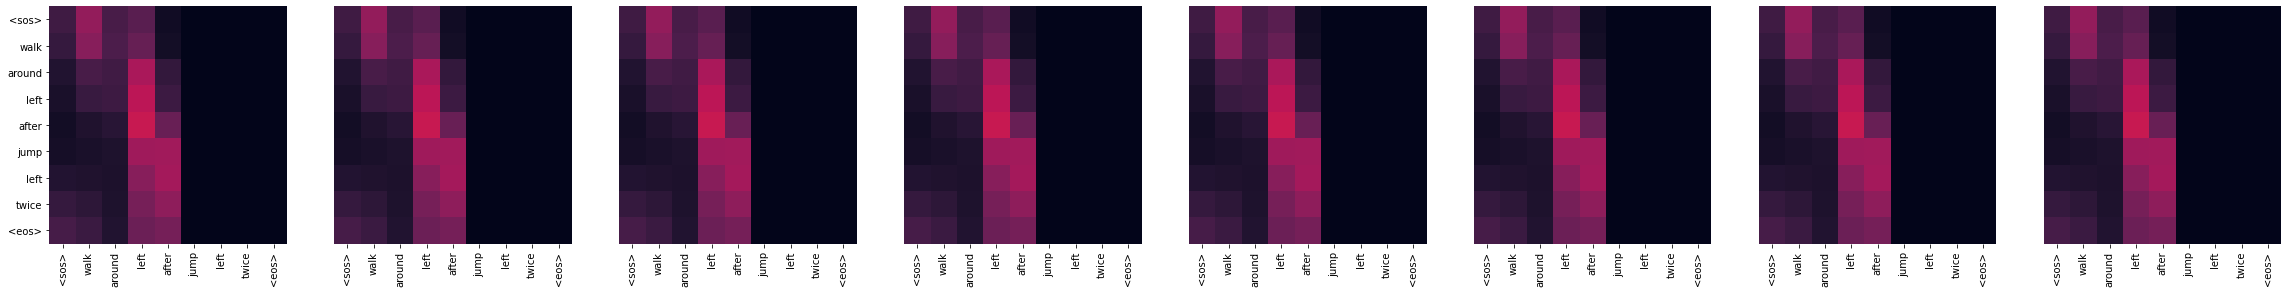

Encoder Layer 2


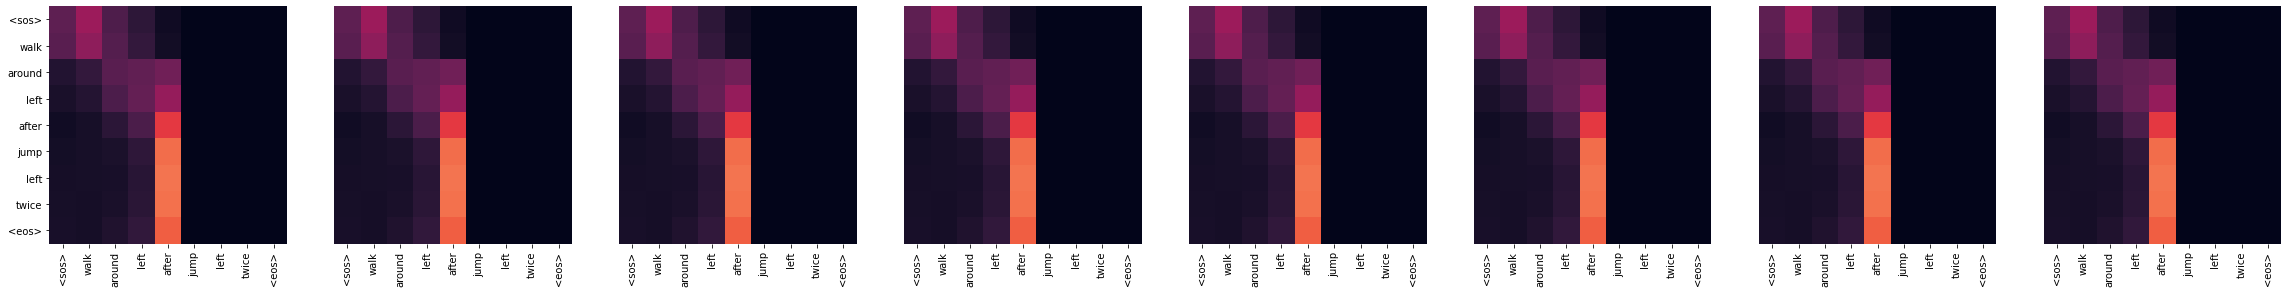

Encoder Layer 3


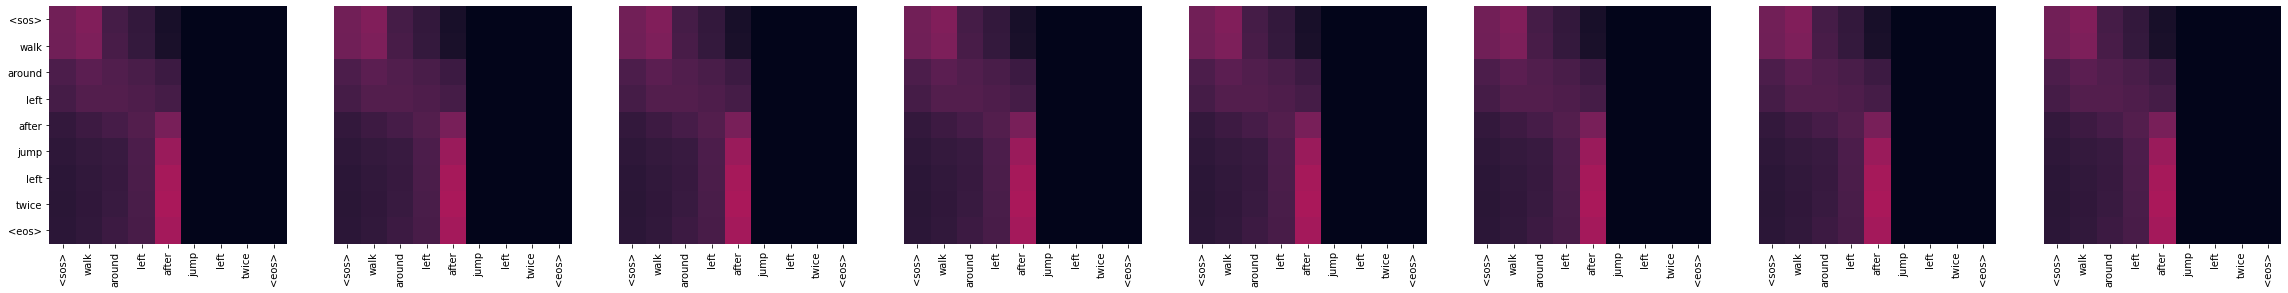

Encoder Layer 4


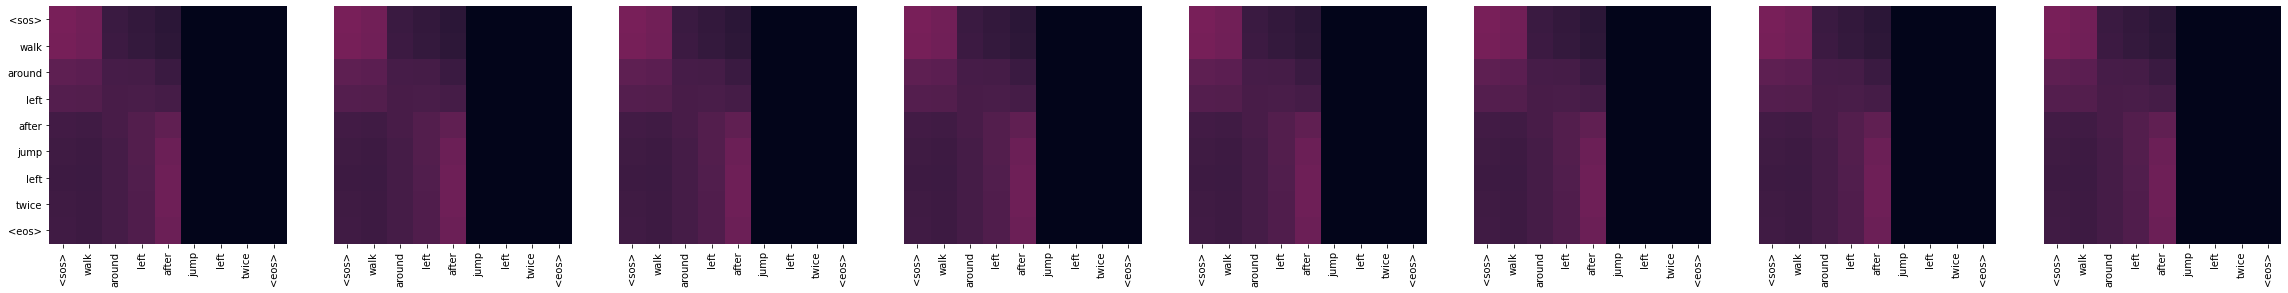

Encoder Layer 5


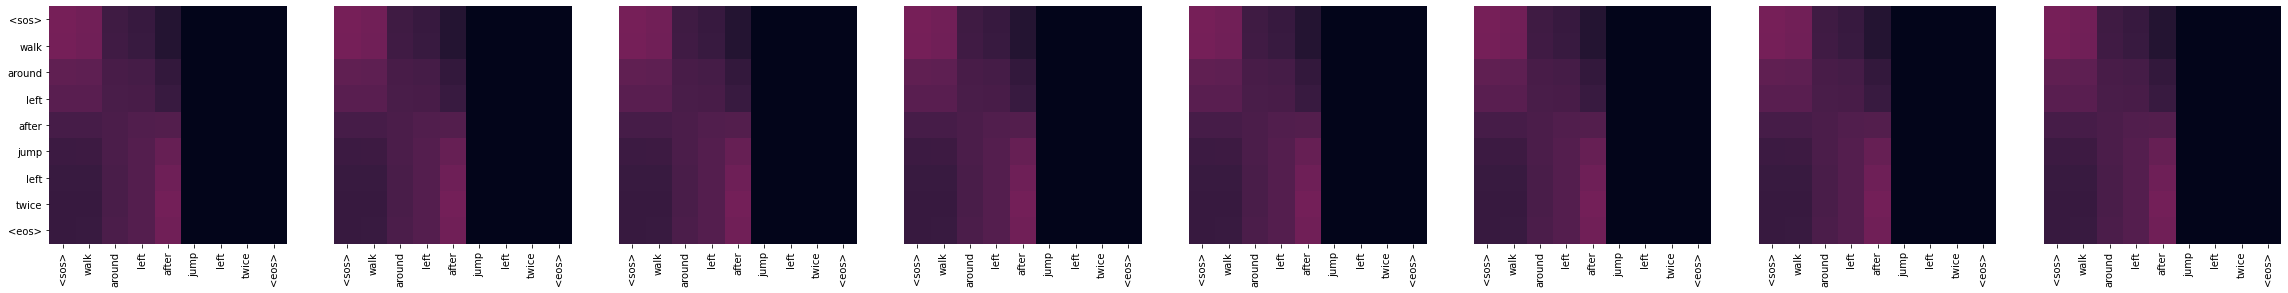

Encoder Layer 6


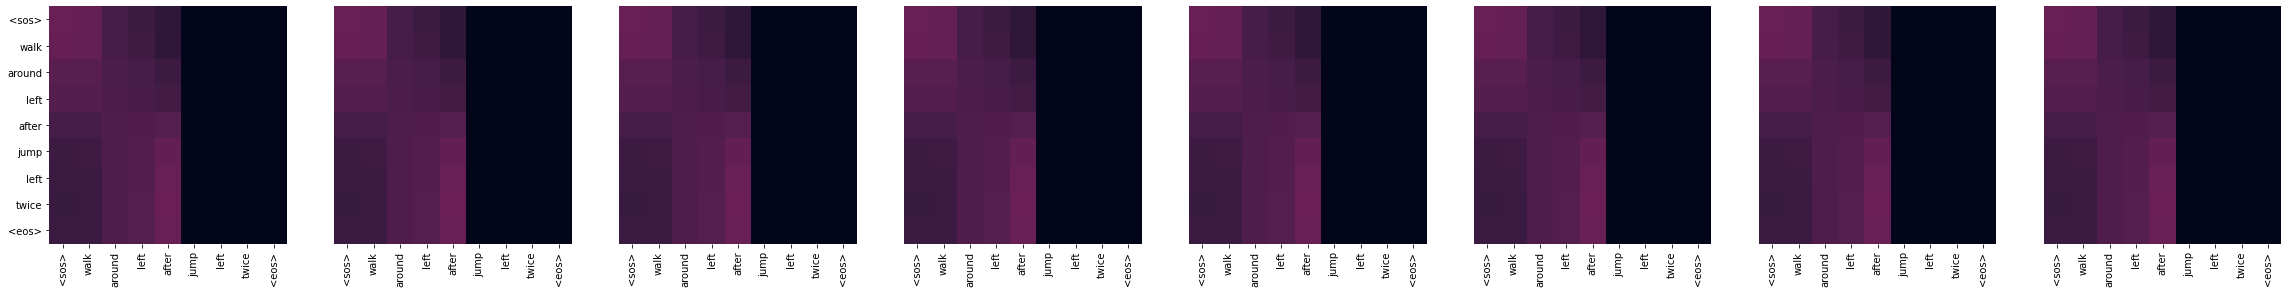

In [8]:
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

def draw(data, x, y, ax):
    seaborn.heatmap(data, 
                    xticklabels=x, square=True, yticklabels=y, vmin=0.0, vmax=1.0, 
                    cbar=False, ax=ax)

    
for layer in range(0, 6):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Encoder Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts[-1].get('Encoder')[layer][-1][:len(ss), :len(ss)], ss, ss if h == 0 else [], ax=axs[h])
    plt.show()

Decoder Self Attention Layer 1


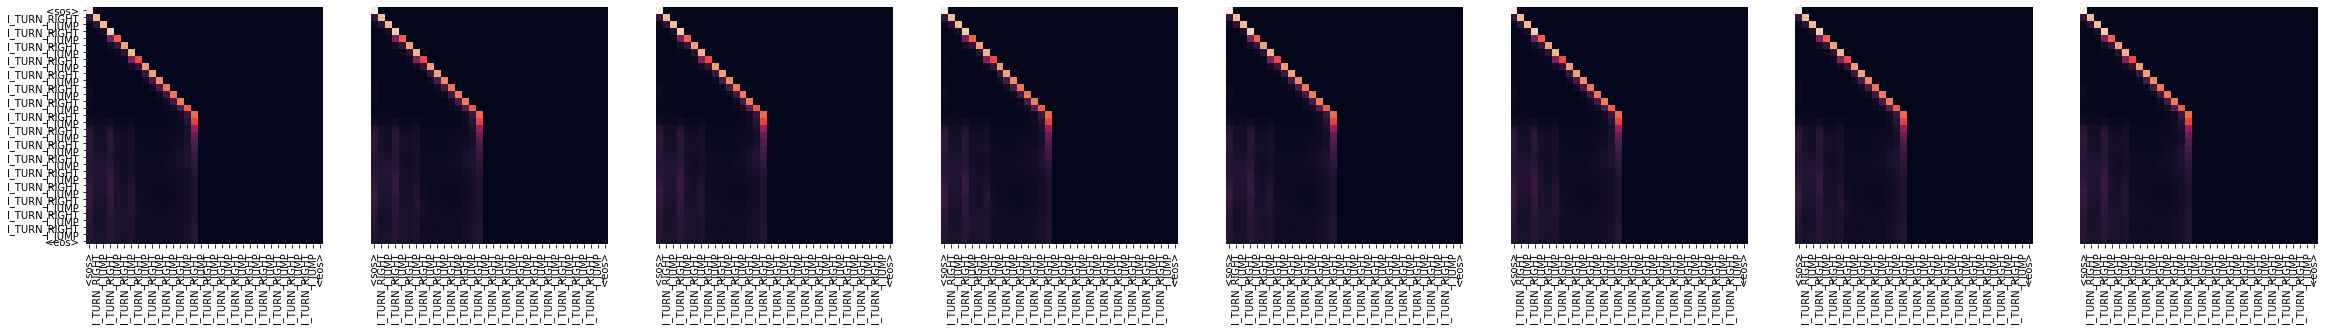

Decoder Self Attention Layer 2


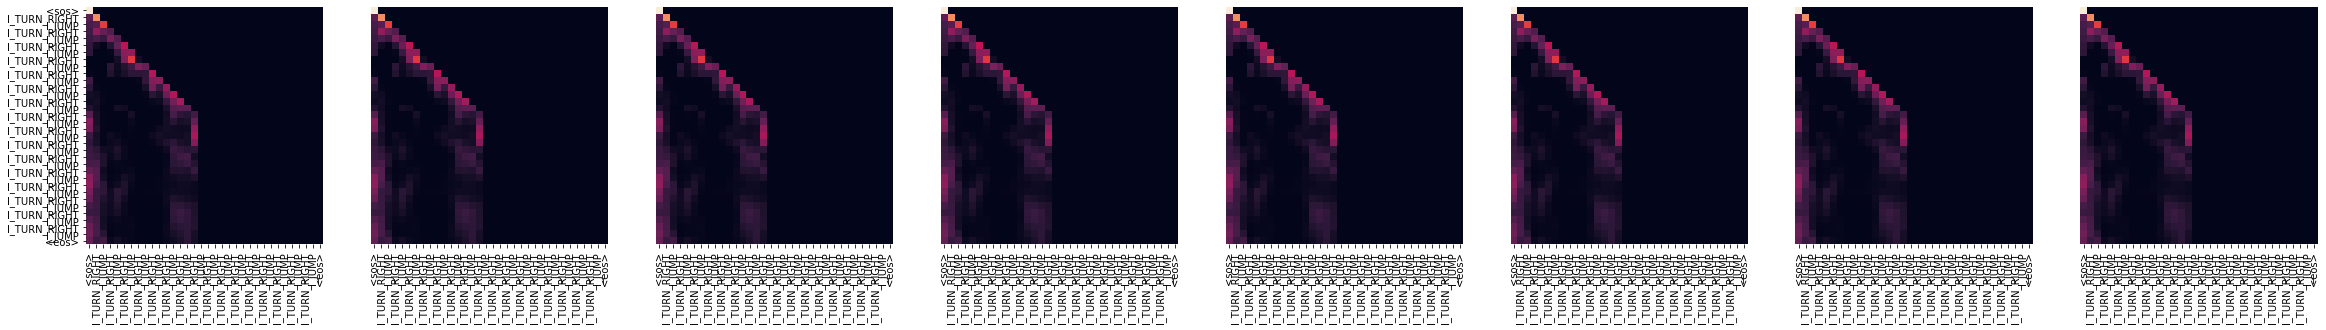

Decoder Self Attention Layer 3


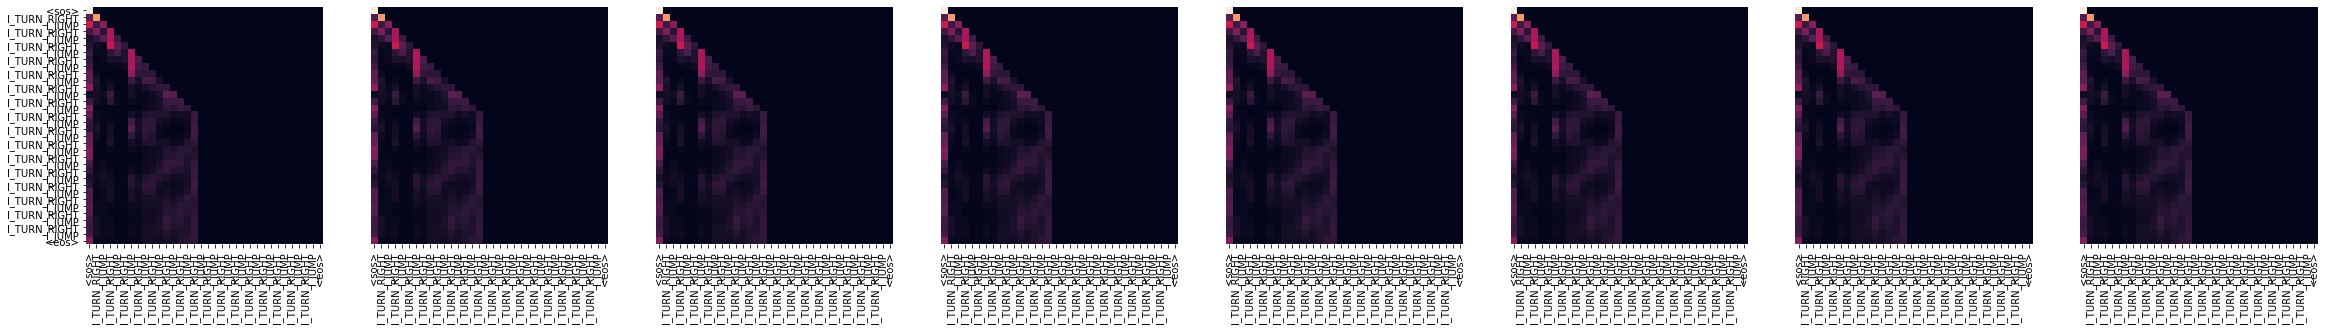

Decoder Self Attention Layer 4


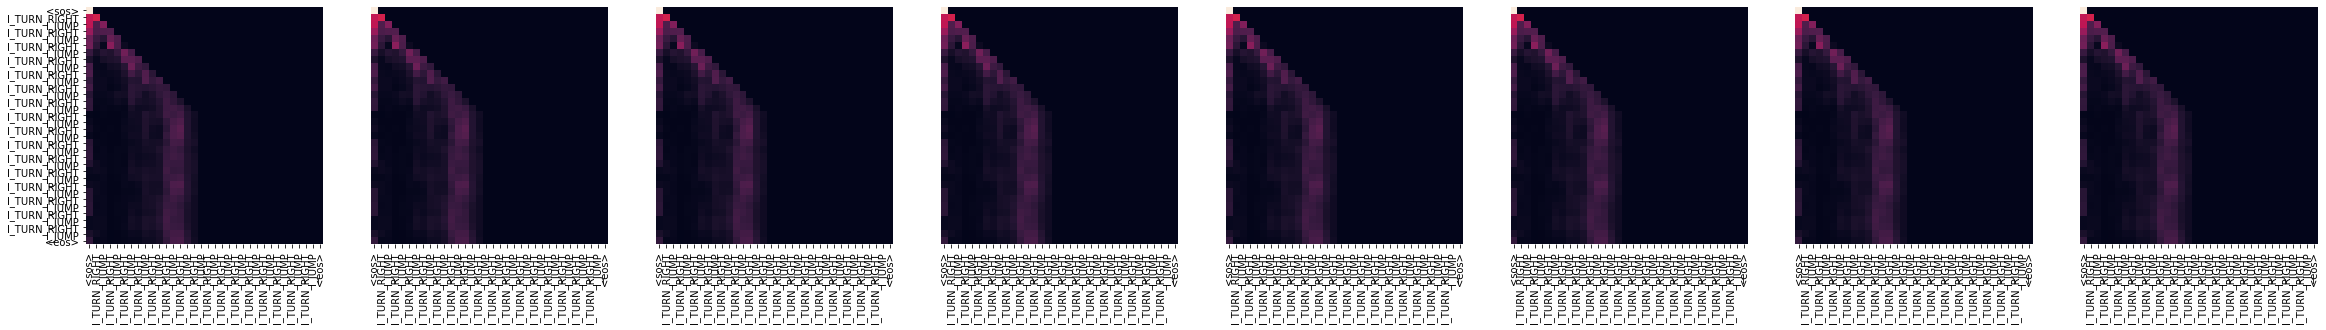

Decoder Self Attention Layer 5


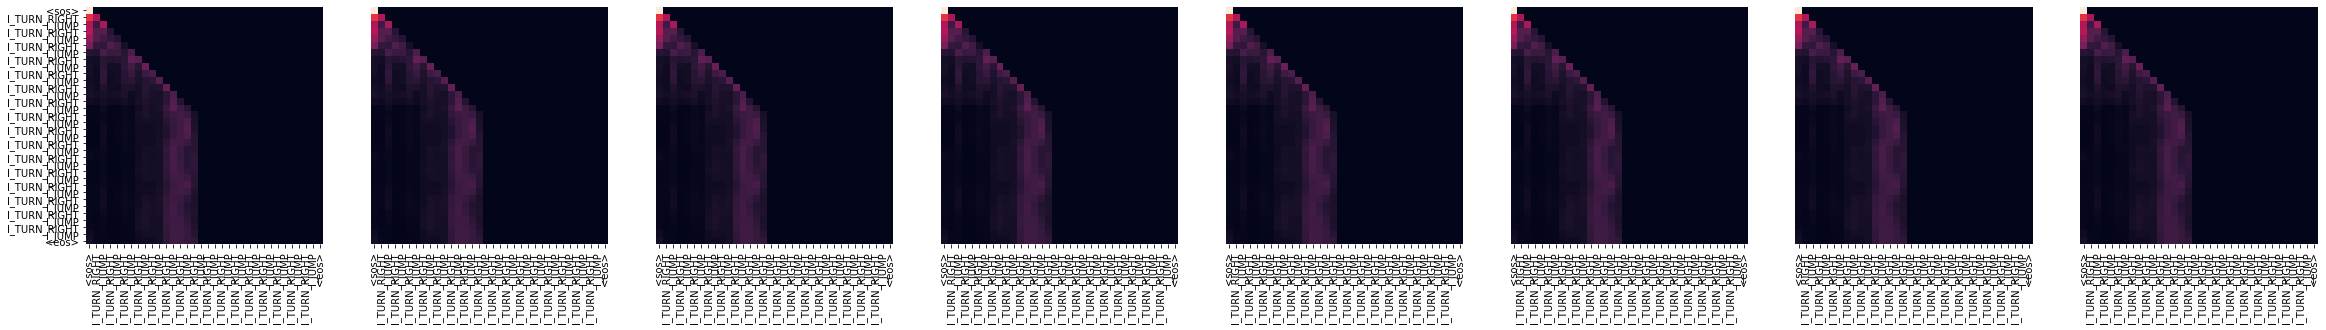

Decoder Self Attention Layer 6


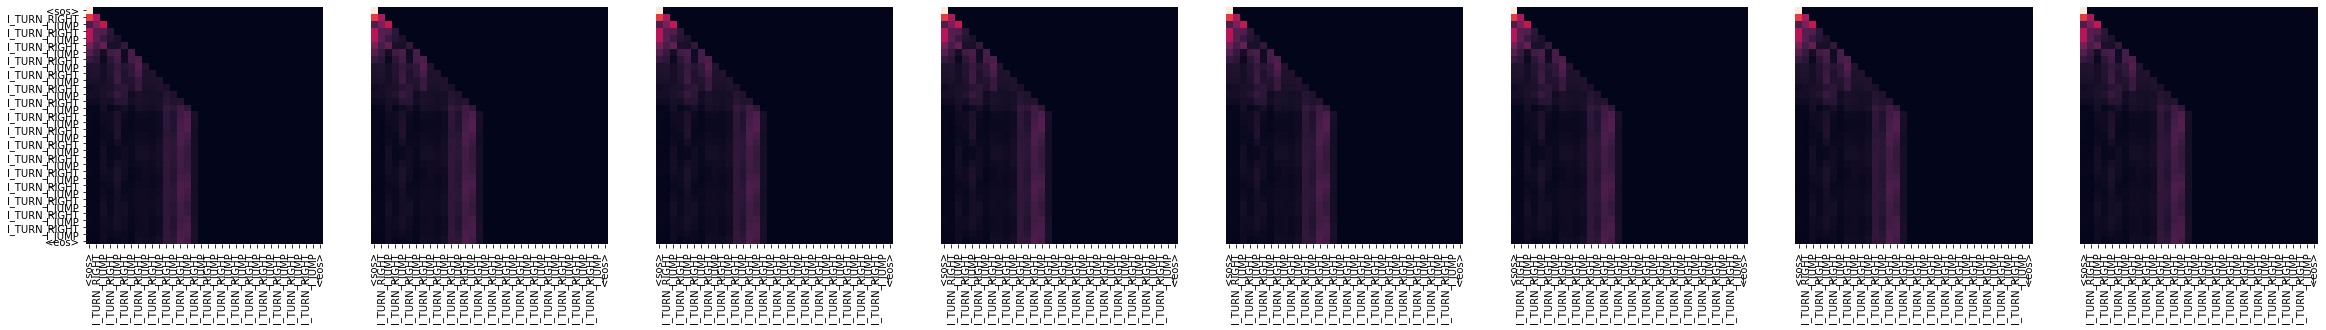

In [5]:
for layer in range(0, 6, 1):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Decoder Self Attention Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts[-1].get('Decoder')[layer].get('Sublayer1')[2][:len(tt), :len(tt)], 
             tt, tt if h == 0 else [], ax=axs[h])
    plt.show()

Decoder MHA Layer 1


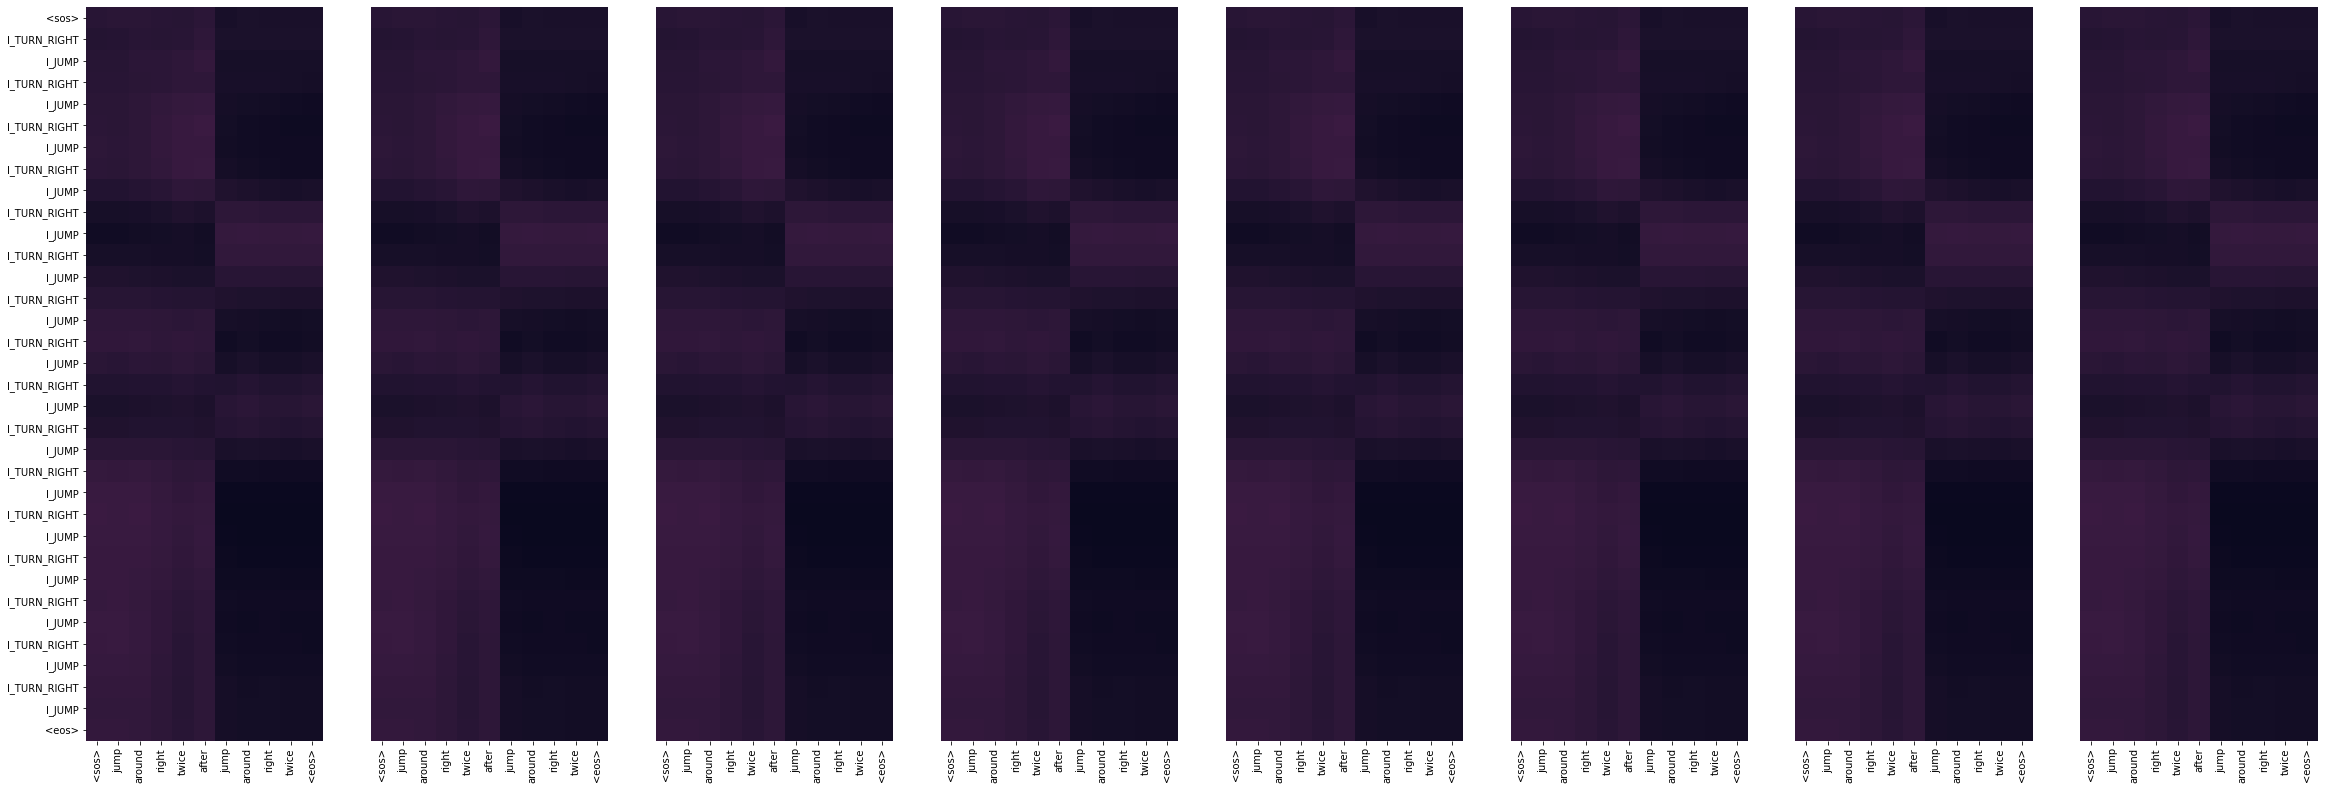

Decoder MHA Layer 2


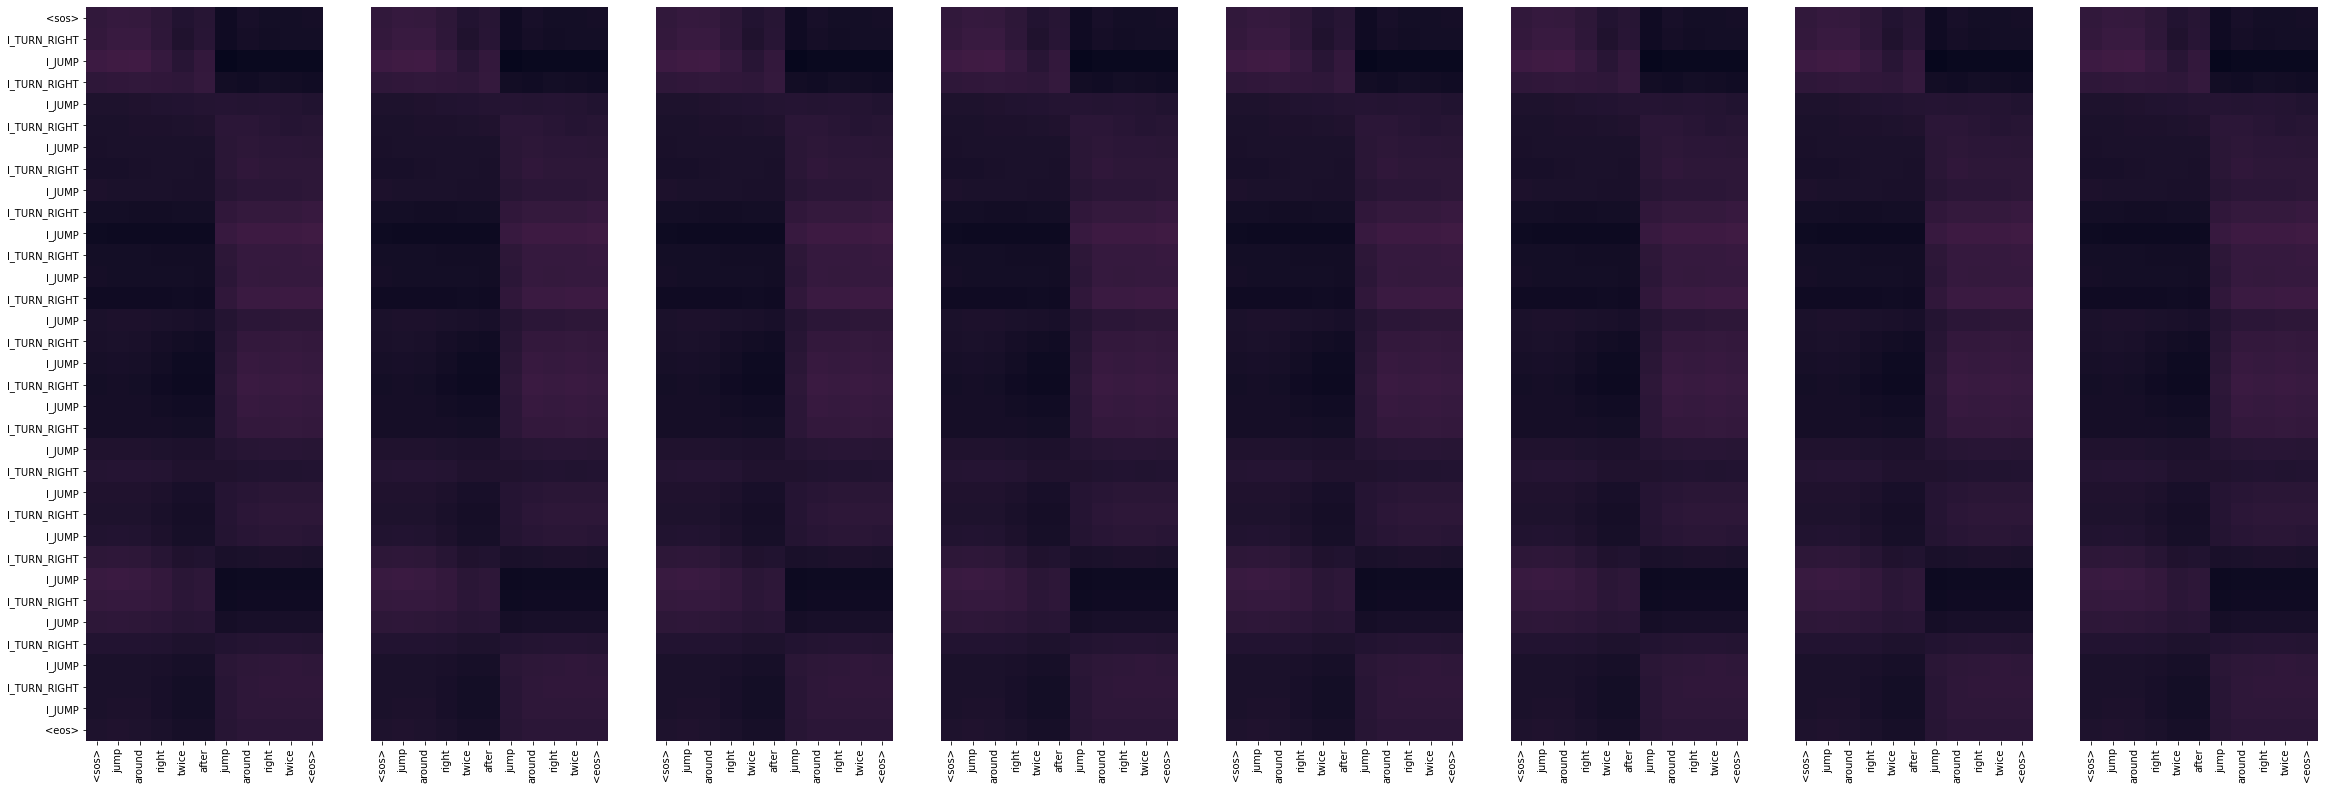

Decoder MHA Layer 3


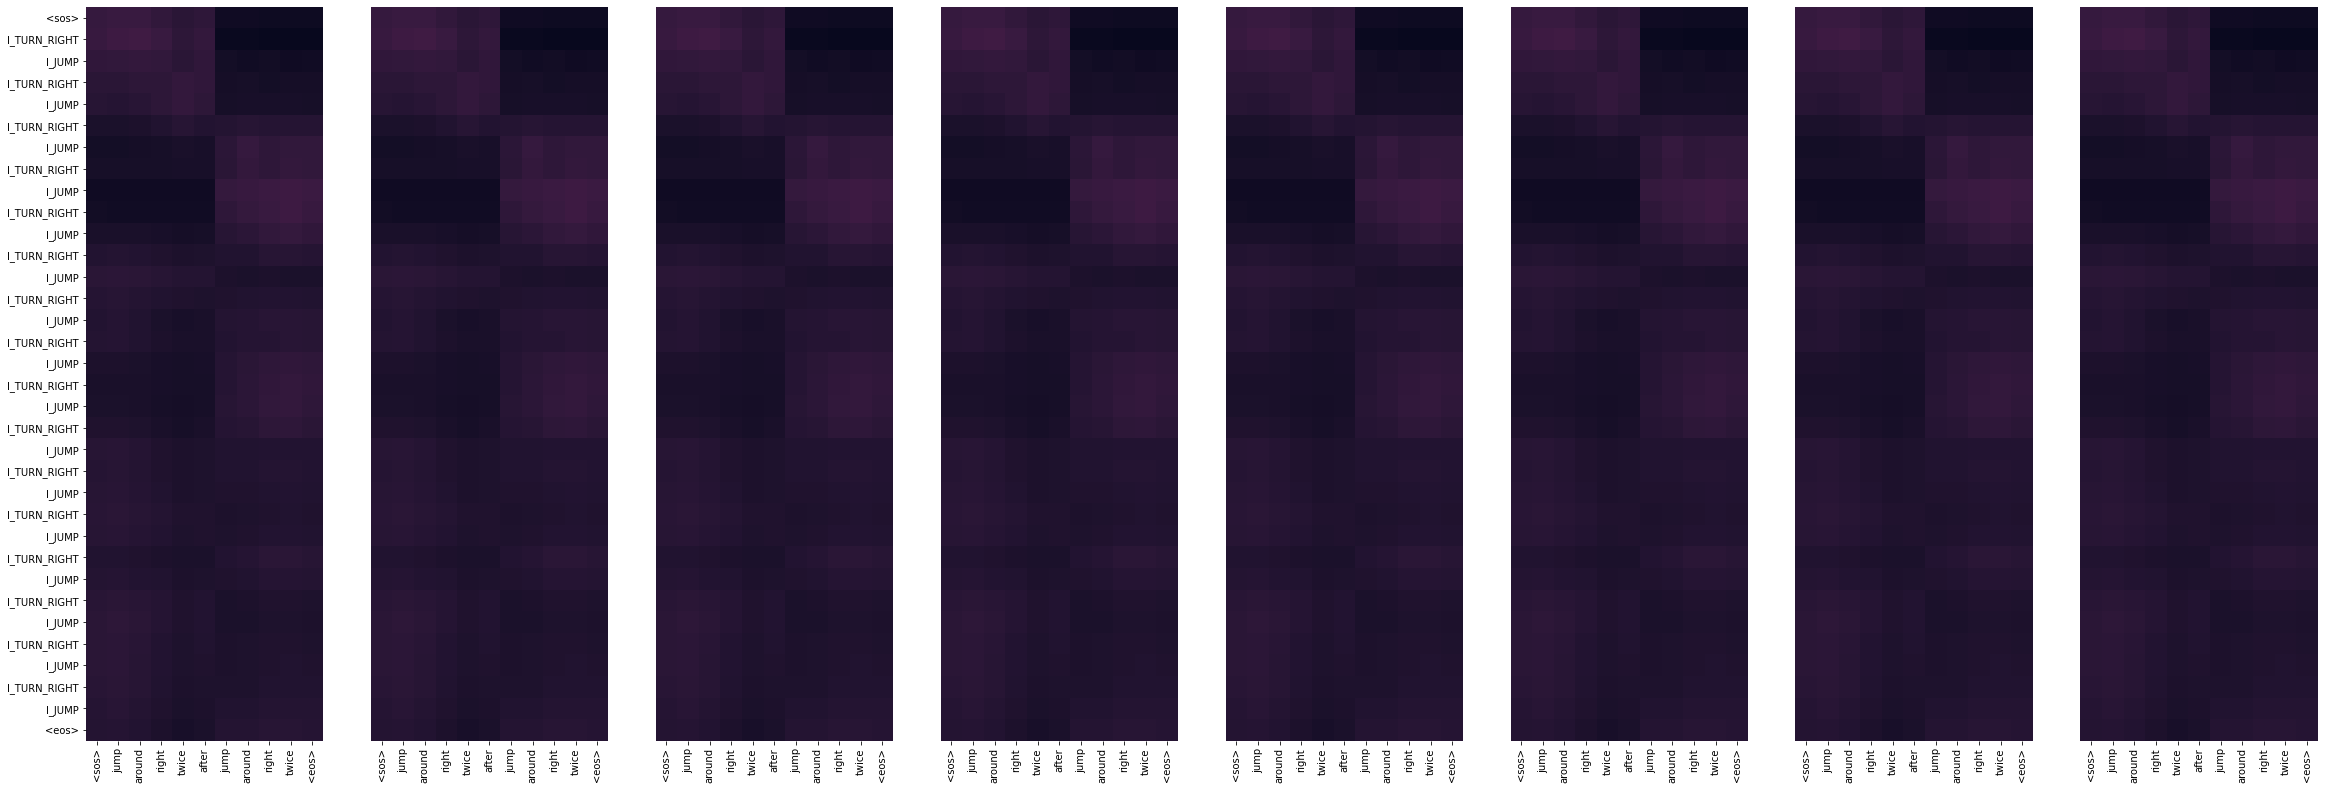

Decoder MHA Layer 4


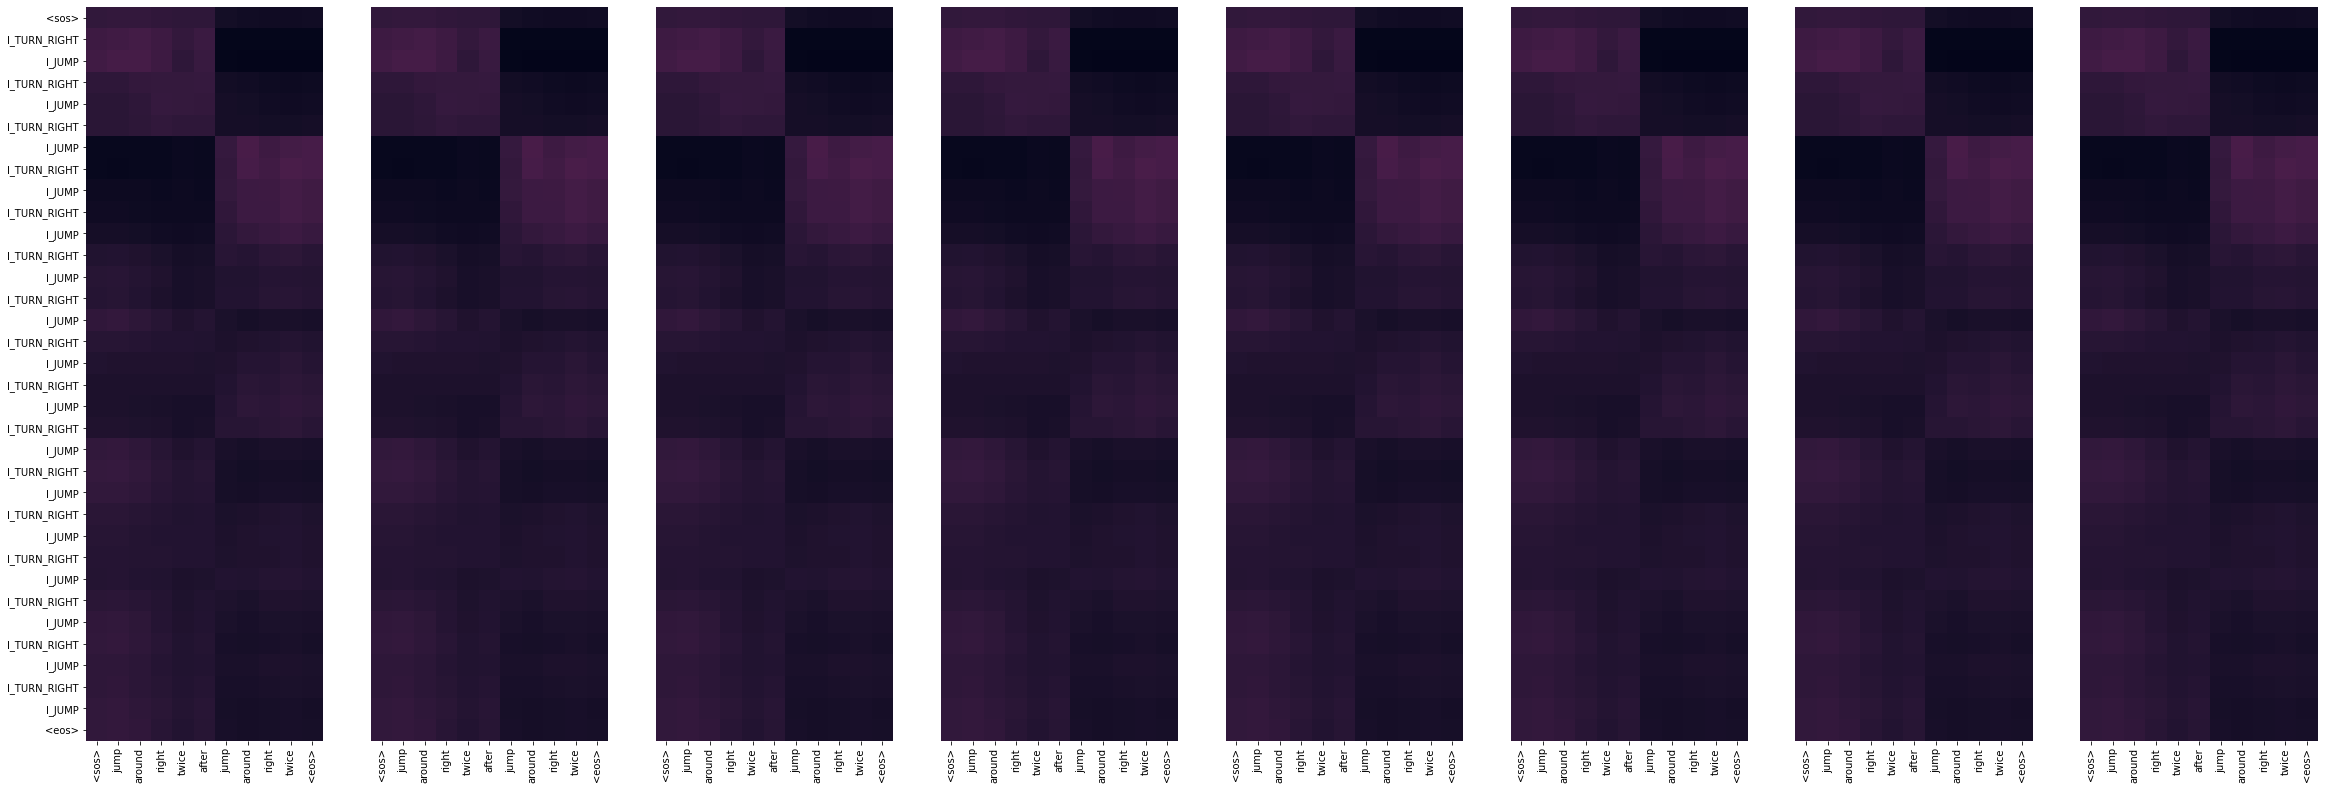

Decoder MHA Layer 5


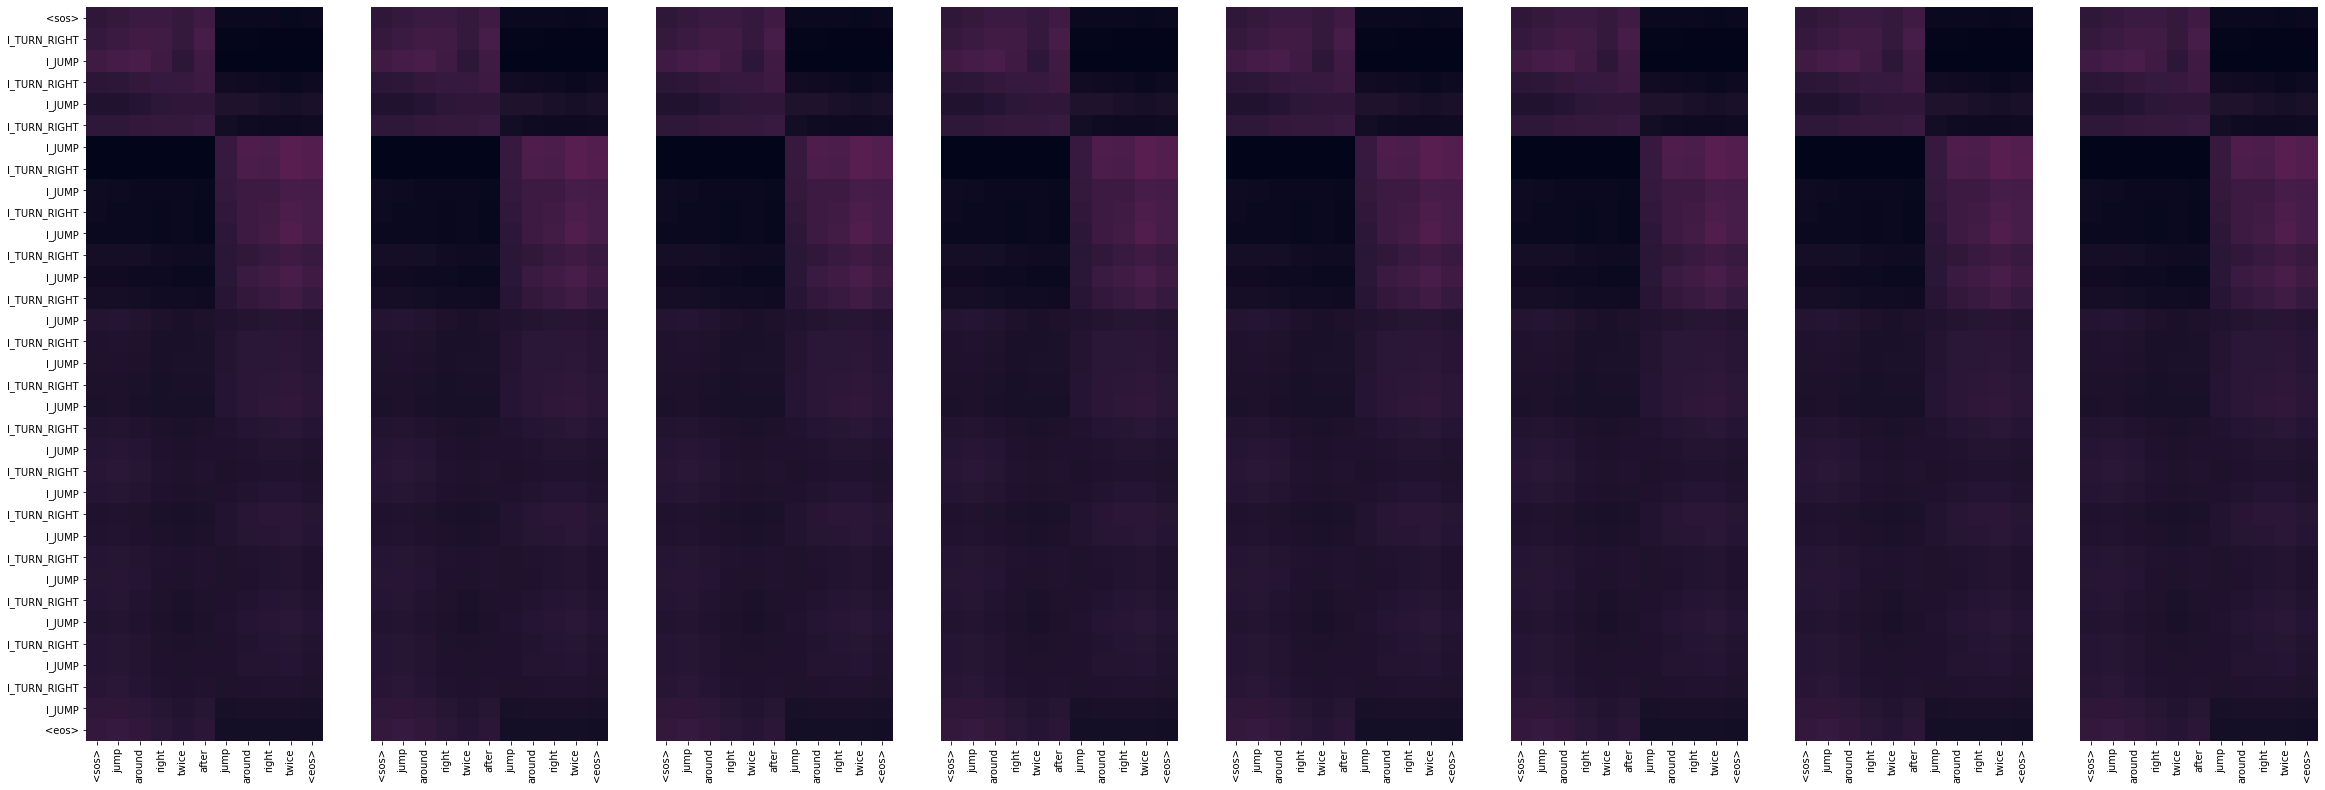

Decoder MHA Layer 6


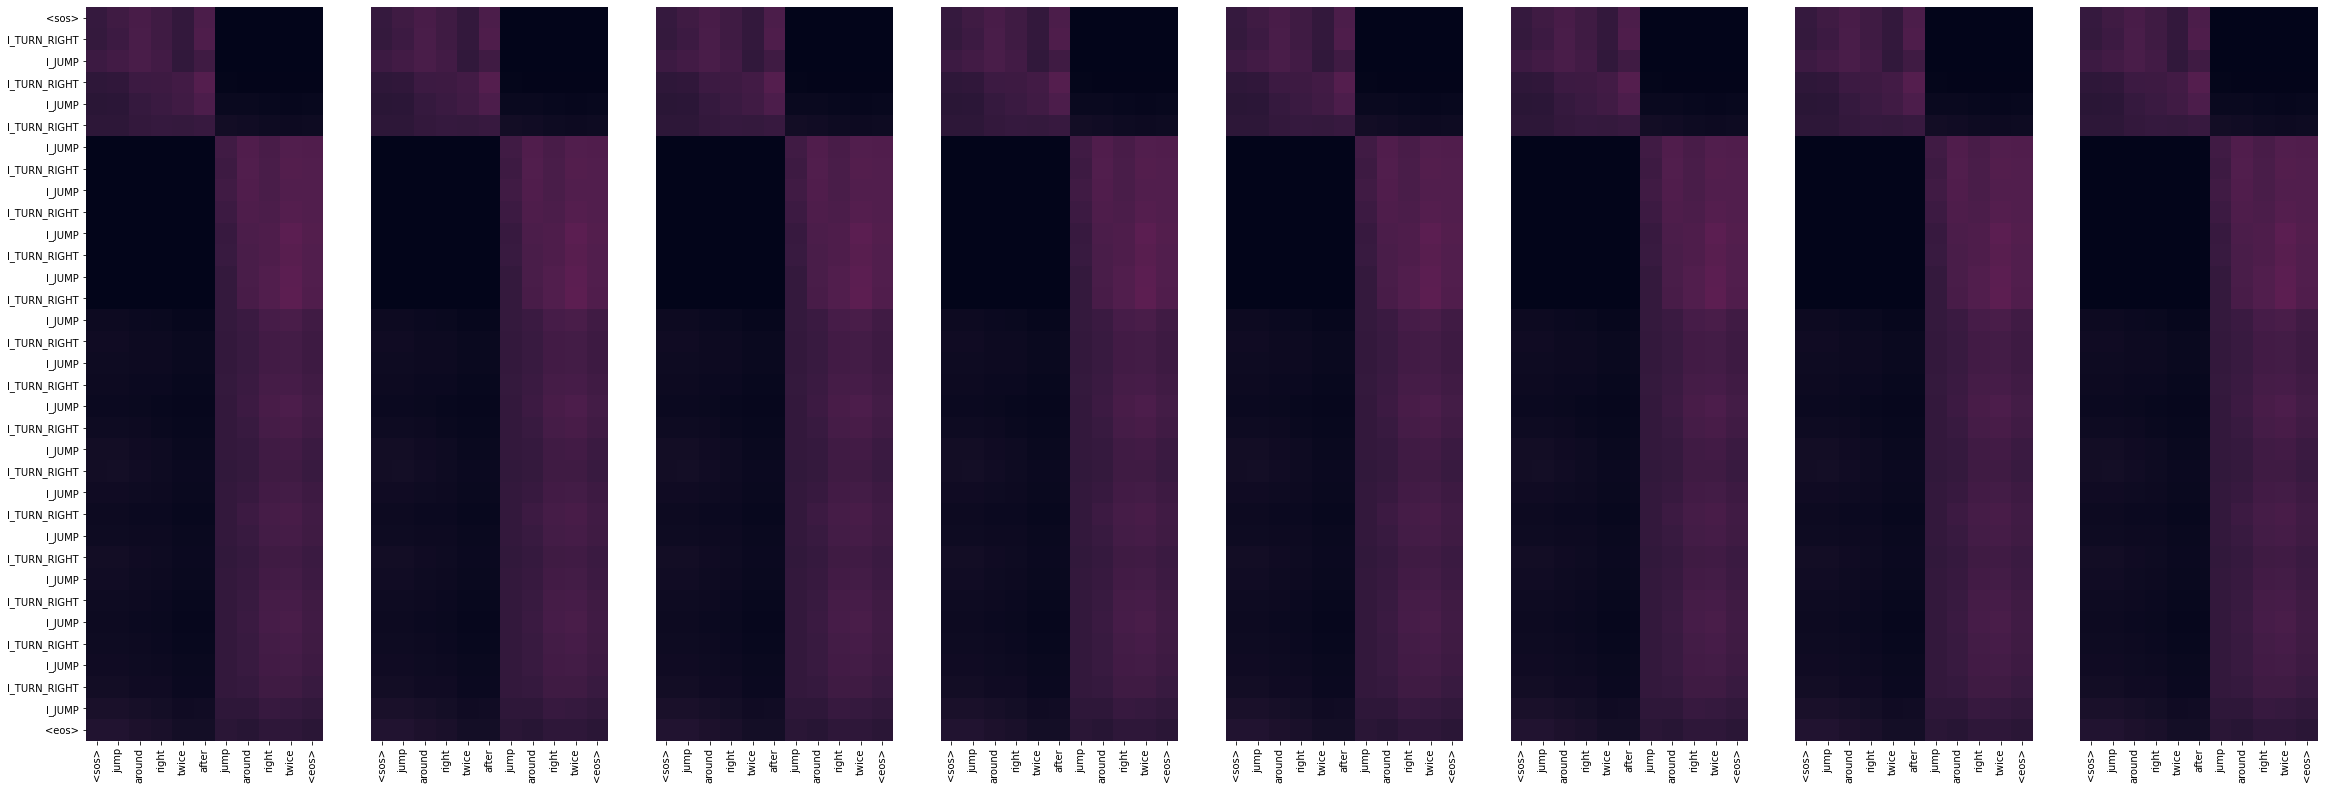

In [6]:
for layer in range(0, 6, 1):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Decoder MHA Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts[-1].get('Decoder')[layer].get('Sublayer2')[2][:len(tt), :len(ss)],
             ss, tt if h == 0 else [], ax=axs[h])
    plt.show()

In [2]:
import torch
from models.models import LanguageParser
model = LanguageParser(
    src_vocab_size=17,
    trg_vocab_size=10,
    d_model=256,
    nhead=8,
    n_layers=2,
    dim_feedforward=512,
    dropout=0.1,
    pad_idx=1,
    device=torch.device('cpu')
)
device = torch.device('cpu')
model.load_state_dict(torch.load('../weights/language_parser/scan/defaults_addjump.pt', map_location=device))
model.device = 'cpu'
model = model.to(device)

In [3]:
preds = []
attn_wts = []
model.eval()
with torch.no_grad():
    for batch in test_data:
        trg_input = batch.trg.transpose(0, 1)[:, :-1]
        out, attn_wt = model(batch.src.transpose(0, 1), trg_input)
        pred = torch.argmax(out, axis=2)
        preds.append(pred)
        attn_wts.append(attn_wt)

NameError: name 'test_data' is not defined

In [1]:
enc_maps = attn_wts[-1].get('Encoder')
fig, axs = plt.subplots(1, 8, figsize=(100, 100))
print(f'Last Stage Encoder Map')
for h in range(8):
    draw(enc_maps[3][2][2][:, h, :].transpose(0, 1)[:, :],'', '' if h == 0 else [], ax=axs[h])
plt.show()

NameError: name 'attn_wts' is not defined

Decoder Self Attention Layer 1


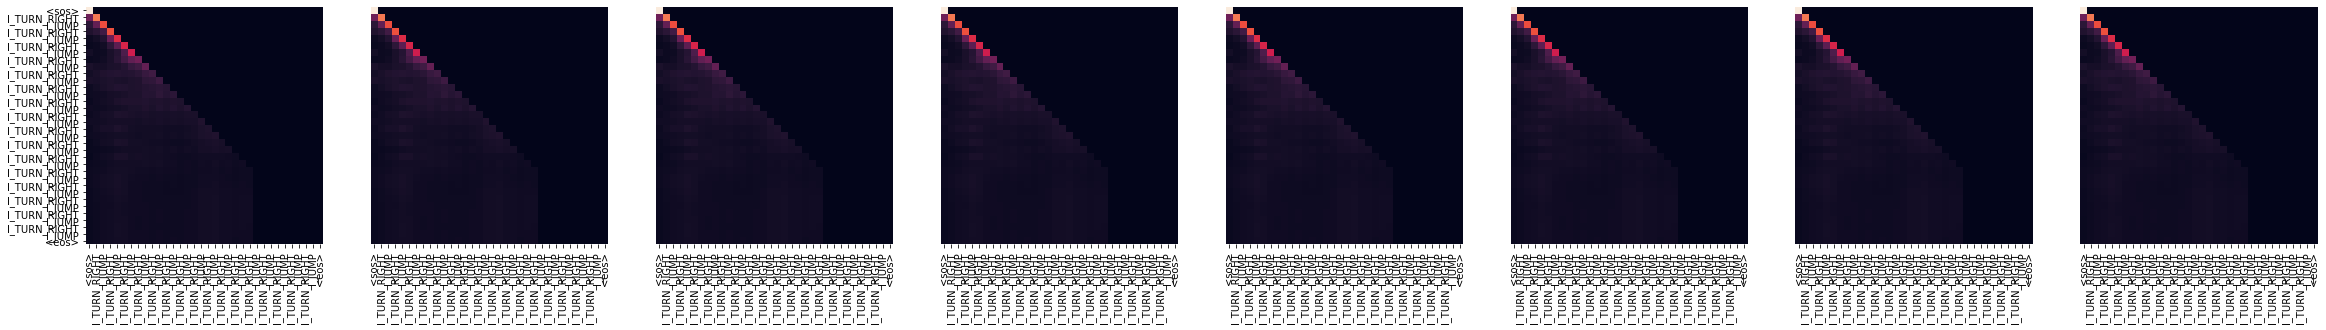

Decoder Self Attention Layer 2


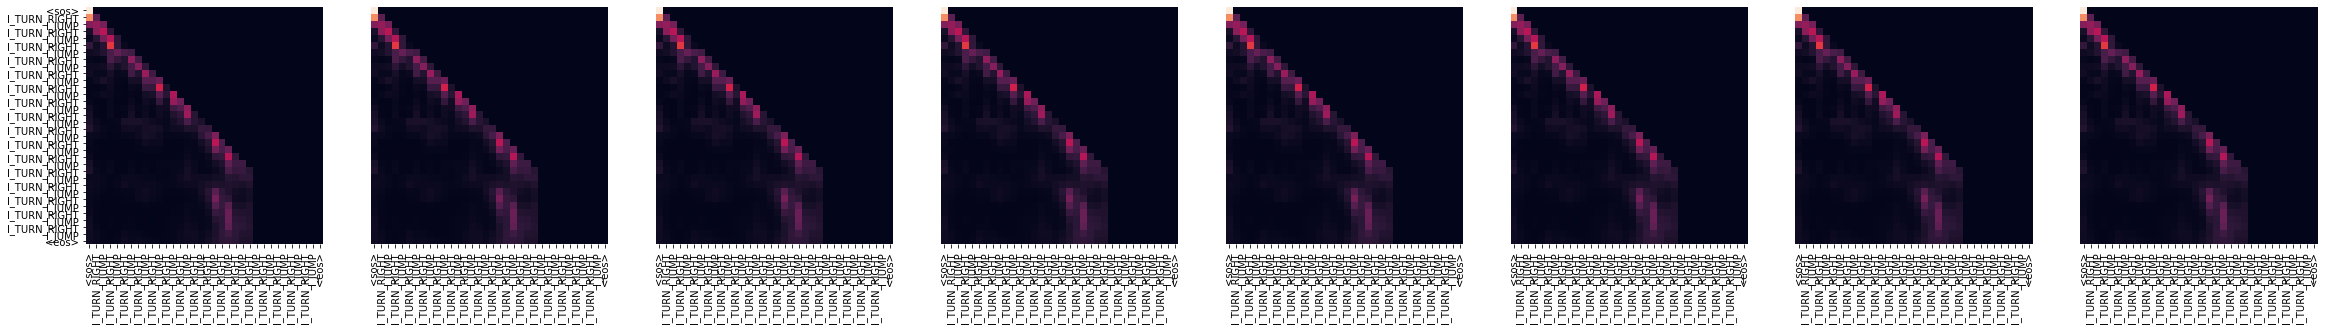

Decoder Self Attention Layer 3


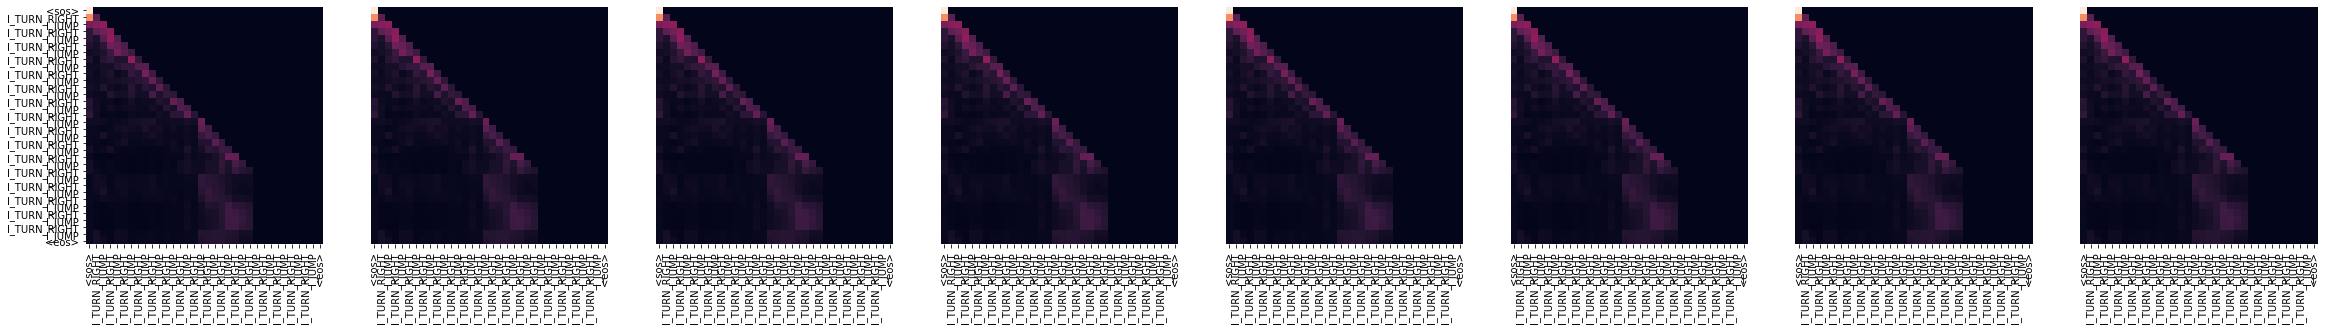

Decoder Self Attention Layer 4


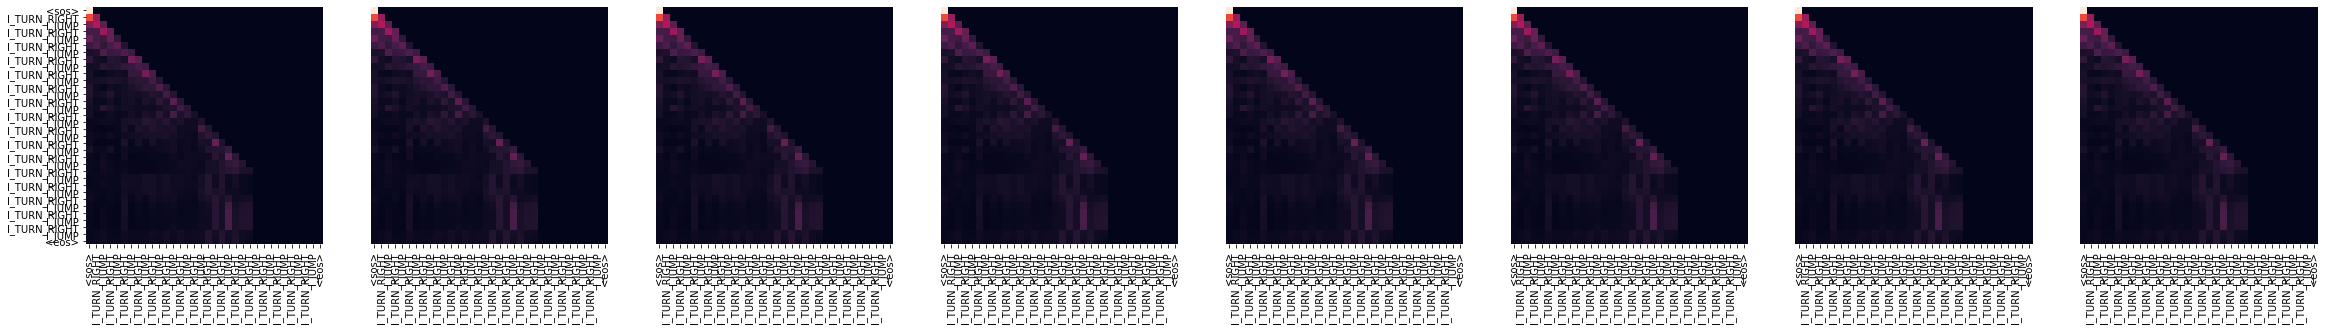

In [10]:
for layer in range(0, 4, 1):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Decoder Self Attention Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts[-1].get('Decoder')[layer].get('Sublayer1')[2][:len(tt), :len(tt)], 
             tt, tt if h == 0 else [], ax=axs[h])
    plt.show()

Decoder MHA Layer 1


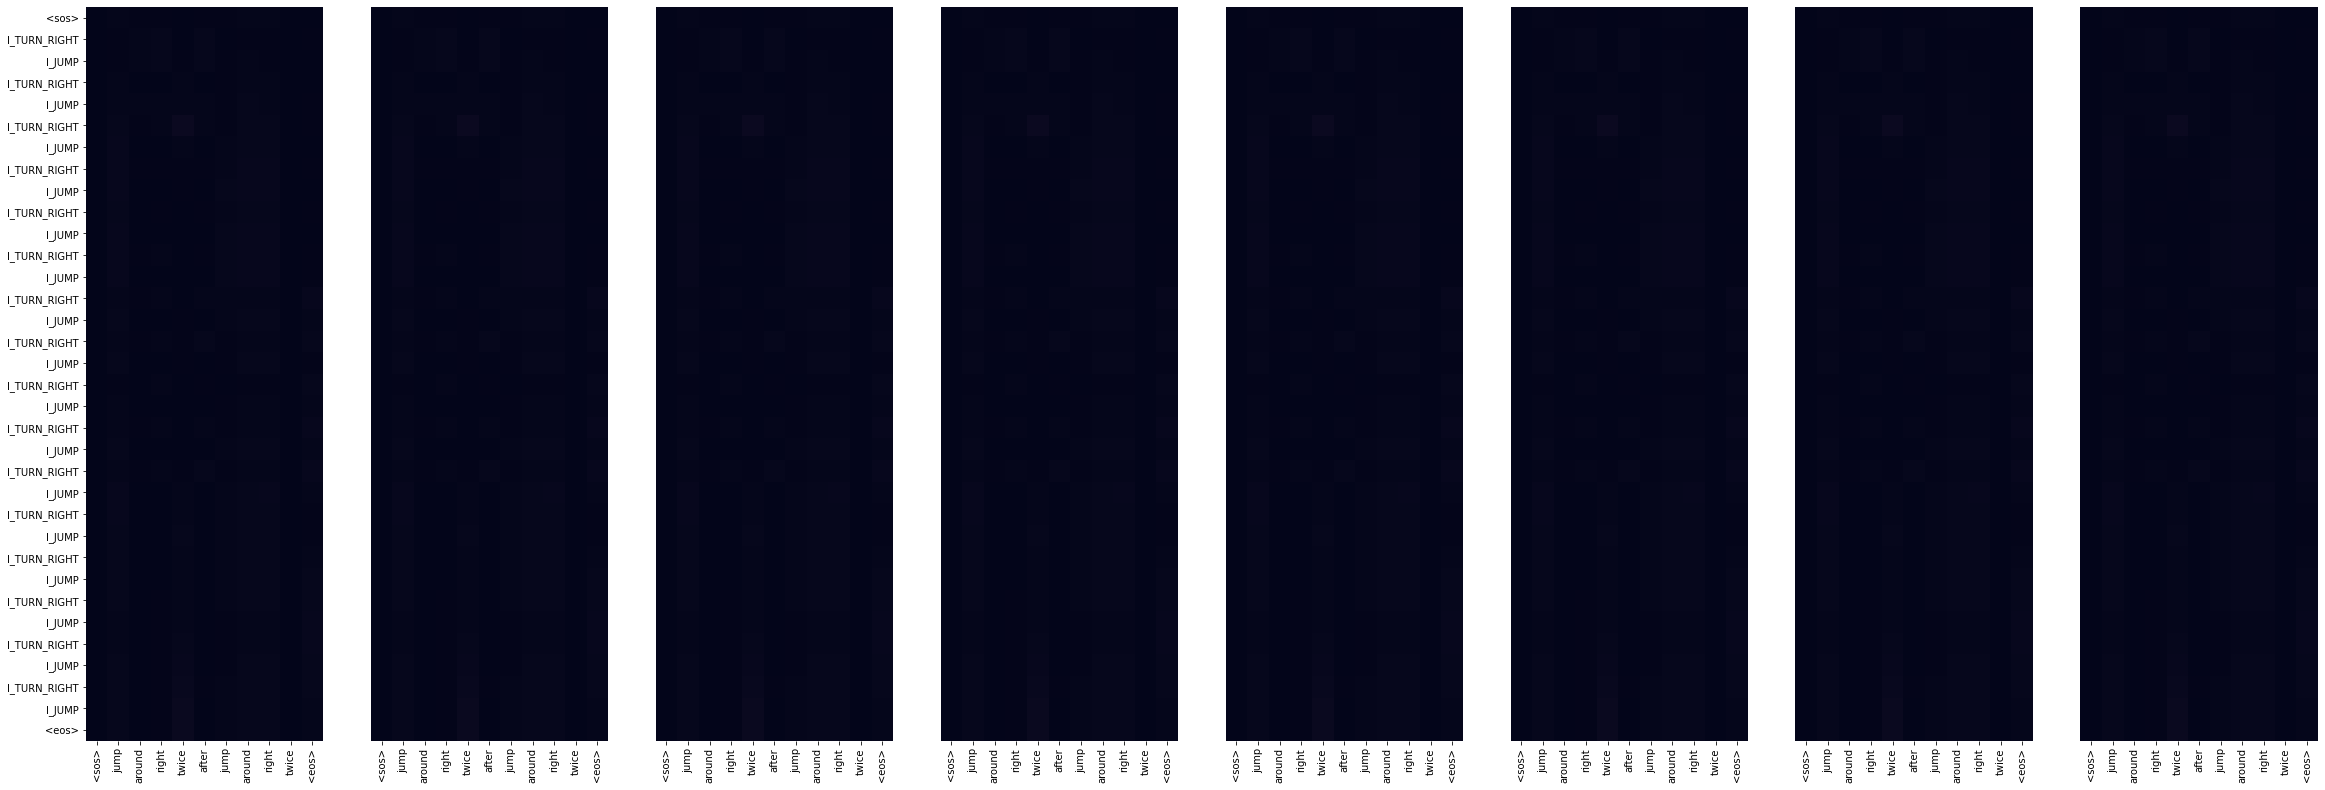

Decoder MHA Layer 2


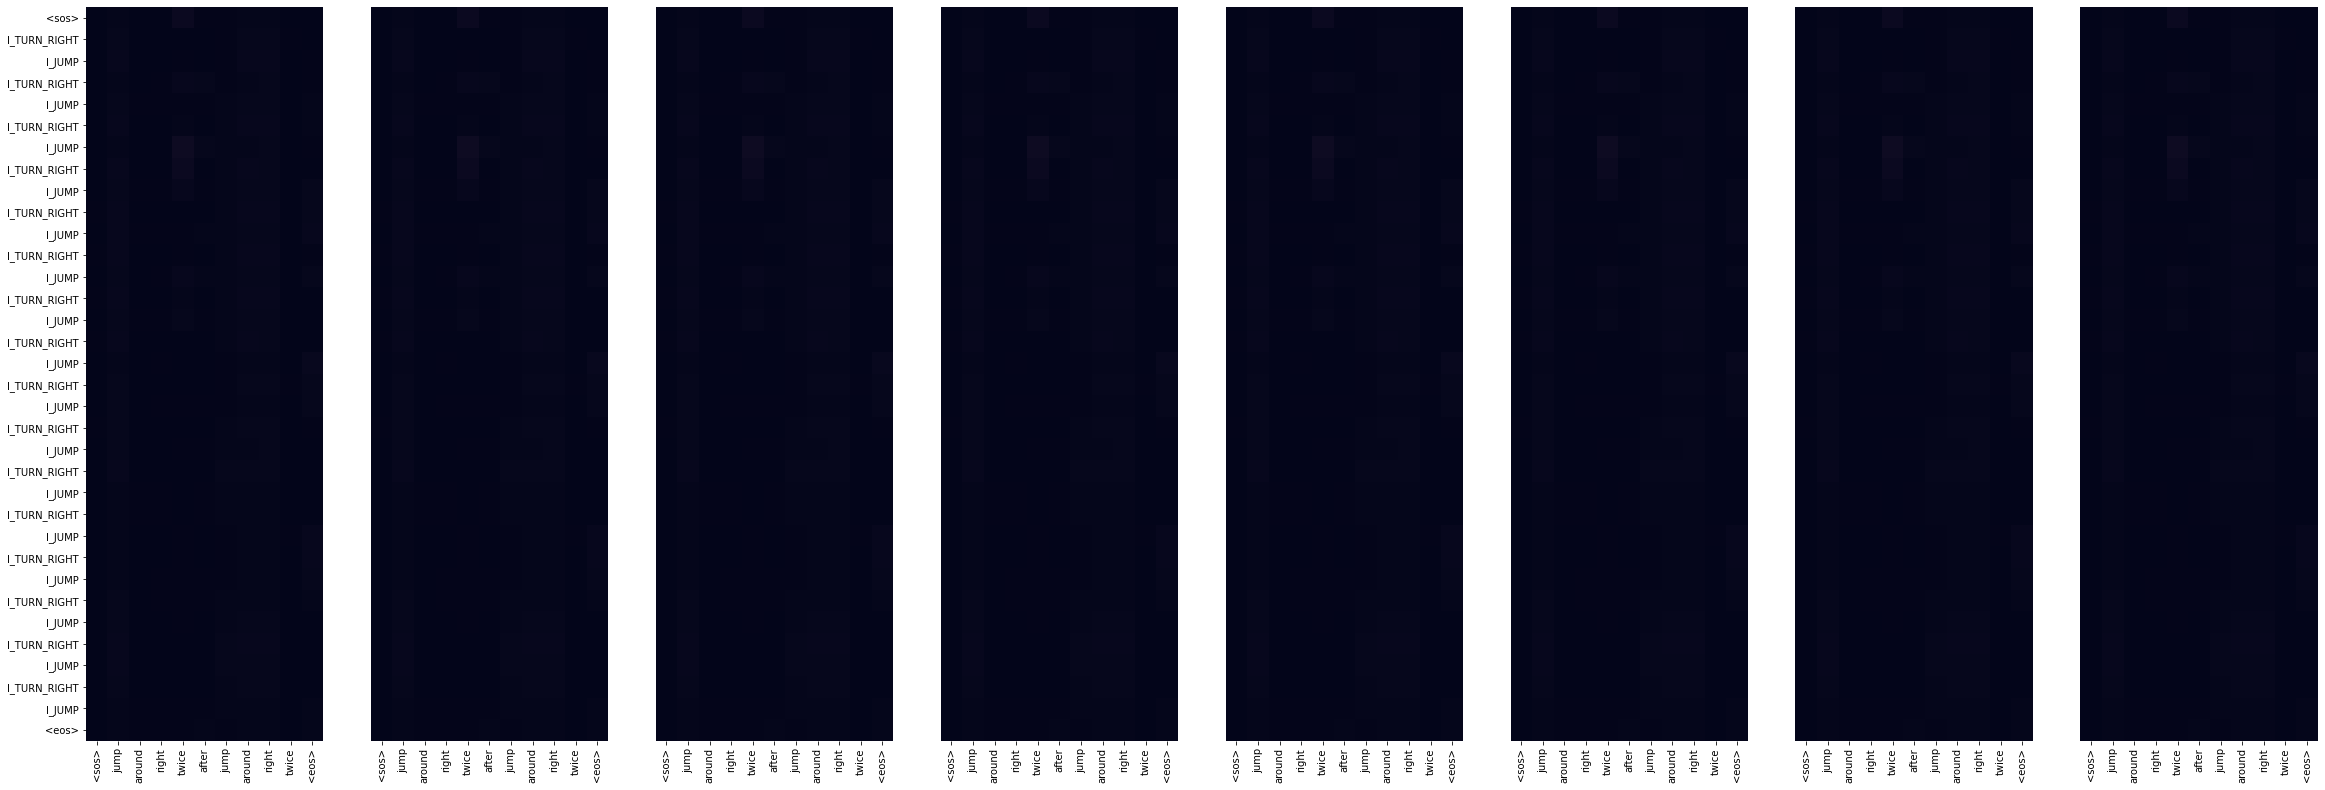

Decoder MHA Layer 3


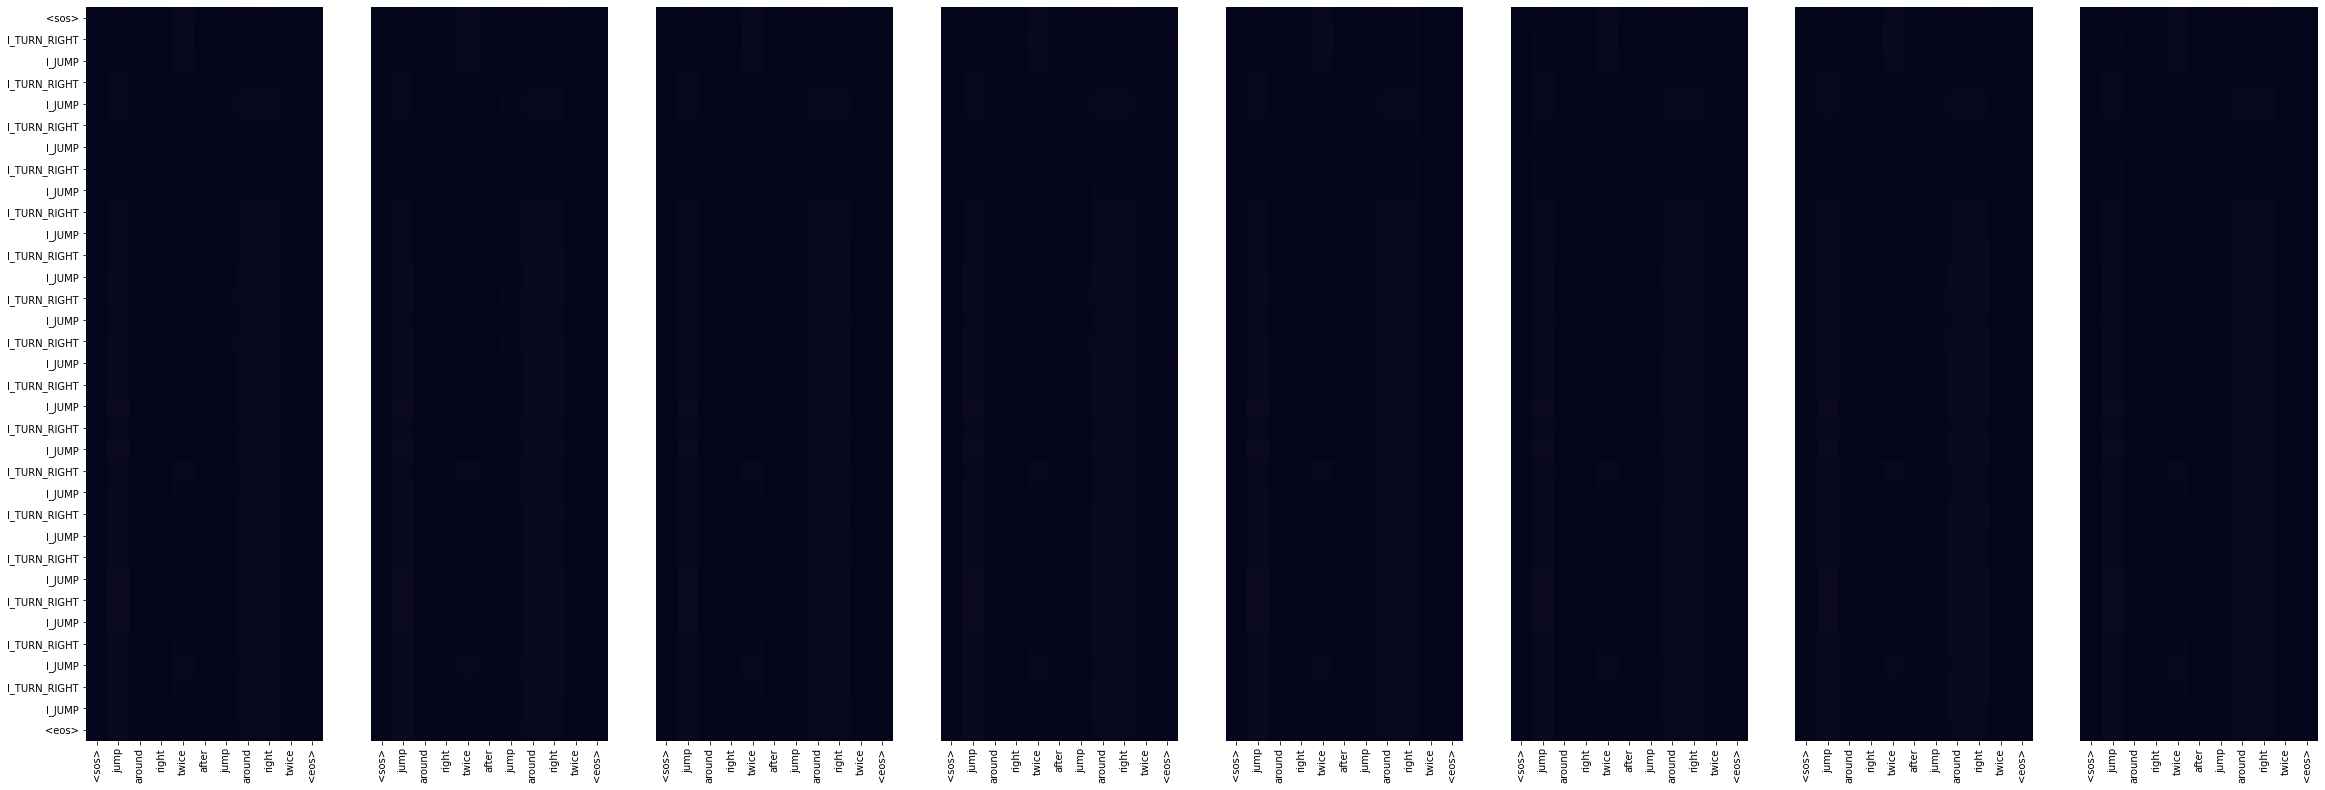

Decoder MHA Layer 4


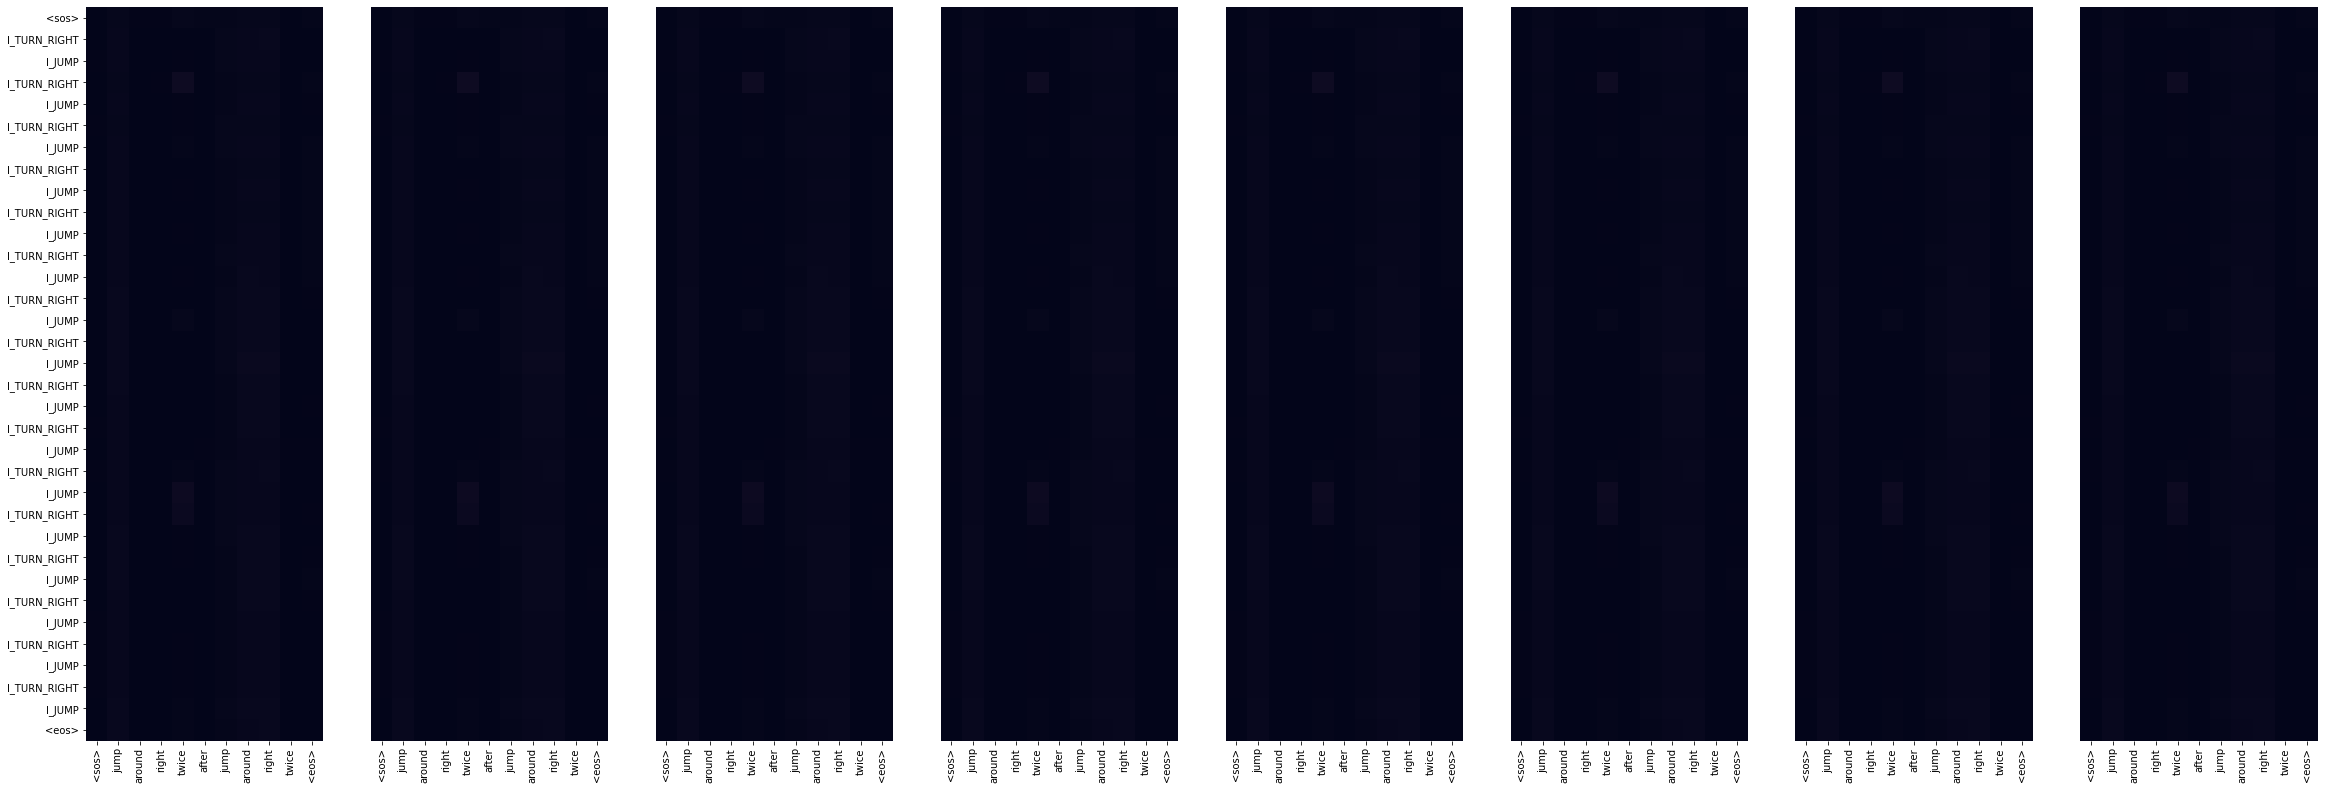

In [11]:
for layer in range(0, 4, 1):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Decoder MHA Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts[-1].get('Decoder')[layer].get('Sublayer2')[2][:len(tt), :len(ss)],
             ss, tt if h == 0 else [], ax=axs[h])
    plt.show()

Sep Transformer Analysis


In [12]:
from data import build_scan
SRC, TRG, train_data, dev_data, test_data, SRC_pos, TRG_pos, train_data_pos, dev_data_pos, test_data_pos = build_scan(split='addjump', batch_size=64, device='cpu', use_pos=True)
srcs = []
trgs = []
src_poss = []
trg_poss = []
preds = []
for ((i, batch), (i_p, batch_pos)) in zip(enumerate(test_data), enumerate(test_data_pos)):
    srcs.append(batch.src.transpose(0, 1))
    trgs.append(batch.trg.transpose(0, 1))
    src_poss.append(batch_pos.src.transpose(0, 1))
    trg_poss.append(batch_pos.trg.transpose(0, 1))
assert len(srcs) == len(trgs) == len(src_poss) == len(trg_poss)

In [13]:
import torch
from models.tp_separate import EmbeddingMultilinearSinusoidal, Encoder, Decoder, Seq2Seq

embedding = EmbeddingMultilinearSinusoidal(d_vocab=17,
                                           d_x=400,
                                           d_r=400//8,
                                           dropout=0.1,
                                           max_length=200)
encoder = Encoder(
    d_x=400,
    d_q=400//8,
    d_k=400//8,
    d_v=400//8,
    d_f=256,
    n_I=8,
    n_L=6,
    use_xv=False,
    dropout=0.1
)
decoder = Decoder(
    d_x=400,
    d_q=400//8,
    d_k=400//8,
    d_v=400//8,
    d_f=256,
    use_xv=False,
    cat_xm=False,
    n_I=8,
    n_L=6,
    dropout=0.1
)

model = Seq2Seq(embedding=embedding,
               encoder=encoder,
               decoder=decoder,
               pad_idx=1,
               use_adversary=False,
               d_x=400,
               d_vocab=17,
               adv_lambda=0.01,
               adv_theta=0.01,
               adv_lr=0.01)

device = torch.device('cpu')
model.load_state_dict(torch.load('../weights/sep-transformer/scan/defaults_addjump.pt', map_location=device))
model = model.to(device)

In [14]:
model.eval()
with torch.no_grad():
    for ((i, batch), (i_p, batch_pos)) in zip(enumerate(test_data), enumerate(test_data_pos)):
       # transpose src and trg
        src = batch.src.transpose(0, 1)
        trg = batch.trg.transpose(0, 1)
        src_ann = batch_pos.src.transpose(0, 1)
        trg_ann = batch_pos.trg.transpose(0, 1)

        # augment trg
        trg_input = trg[:, :-1]
        trg_ann_input = trg_ann[:, :-1]
        trg_out = trg[:, 1:]
        trg_ann_out = trg_ann[:, 1:]

        out, adv_stat, attn_wts = model(src, trg_input, src_ann, trg_ann_input)
        
        pred = torch.argmax(out, axis=2)
        preds.append(pred)

Encoder Layer 1


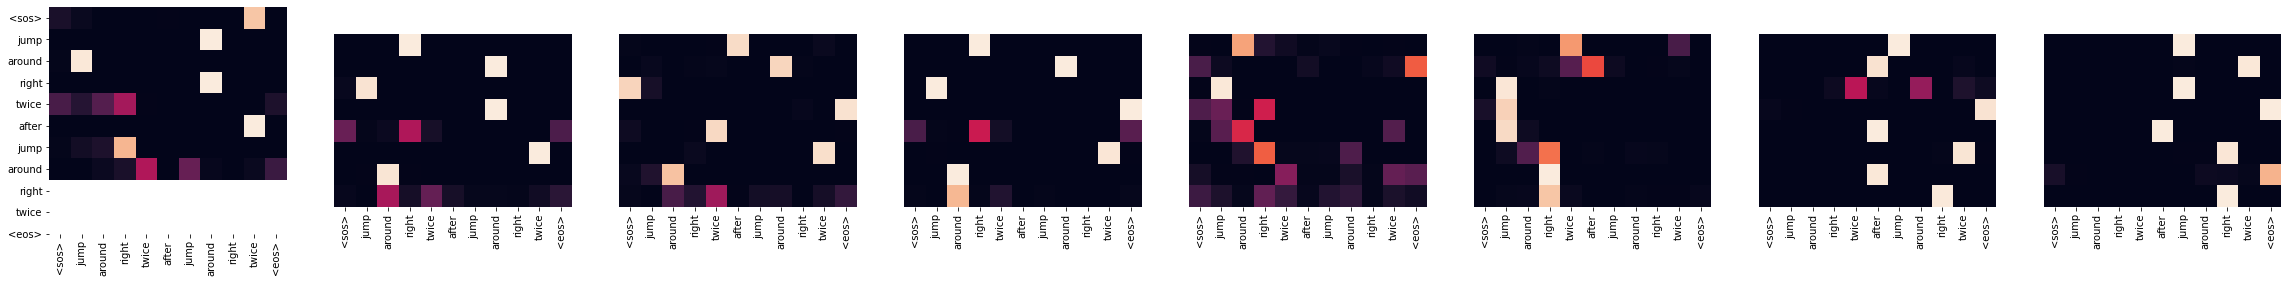

Encoder Layer 2


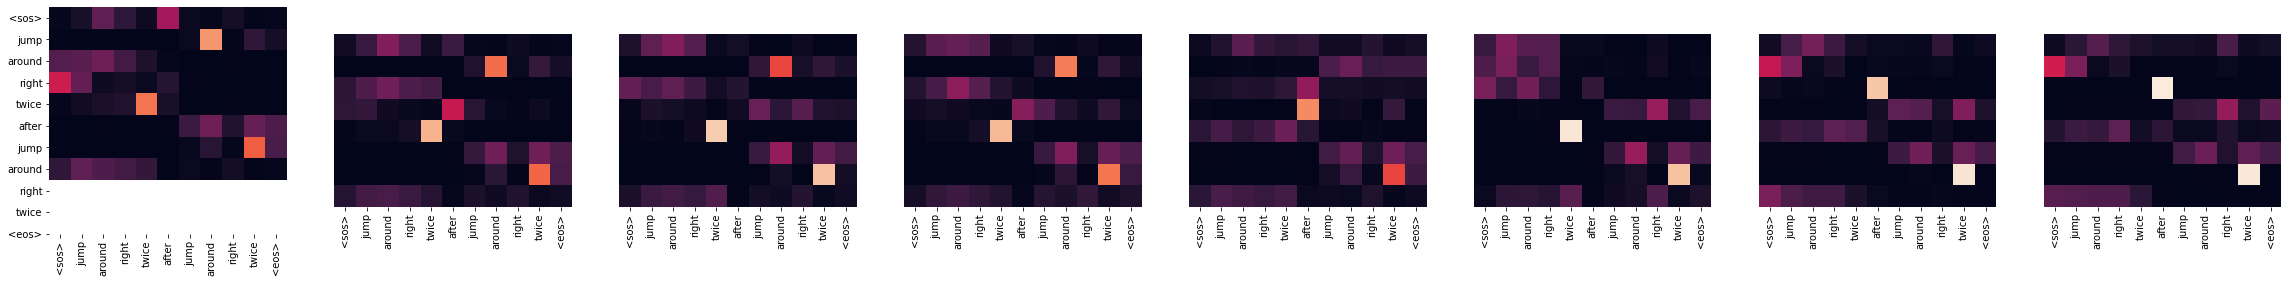

Encoder Layer 3


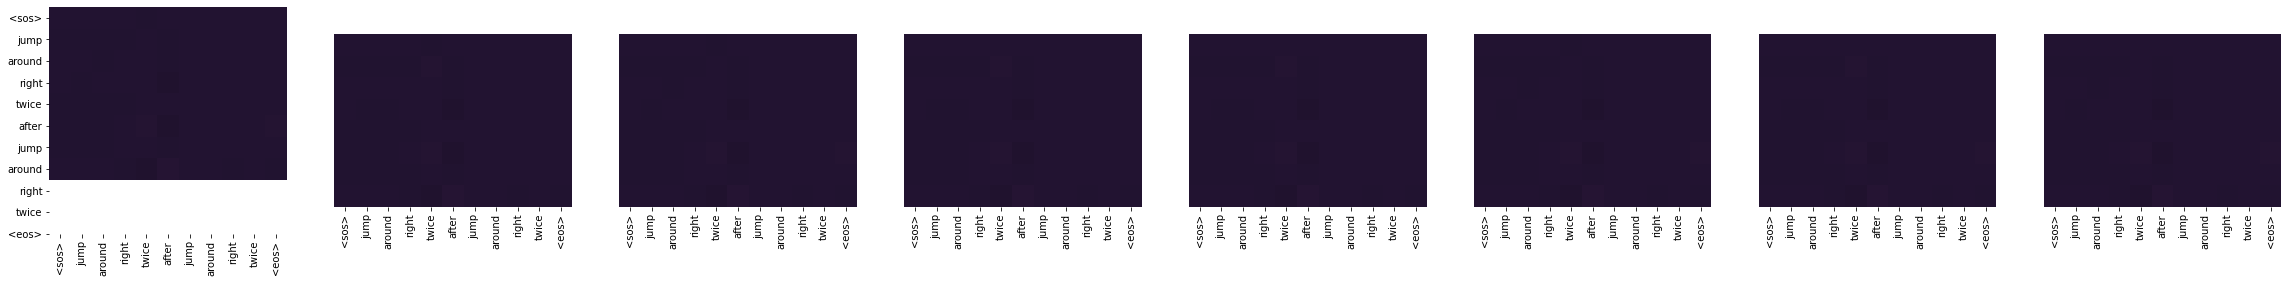

Encoder Layer 4


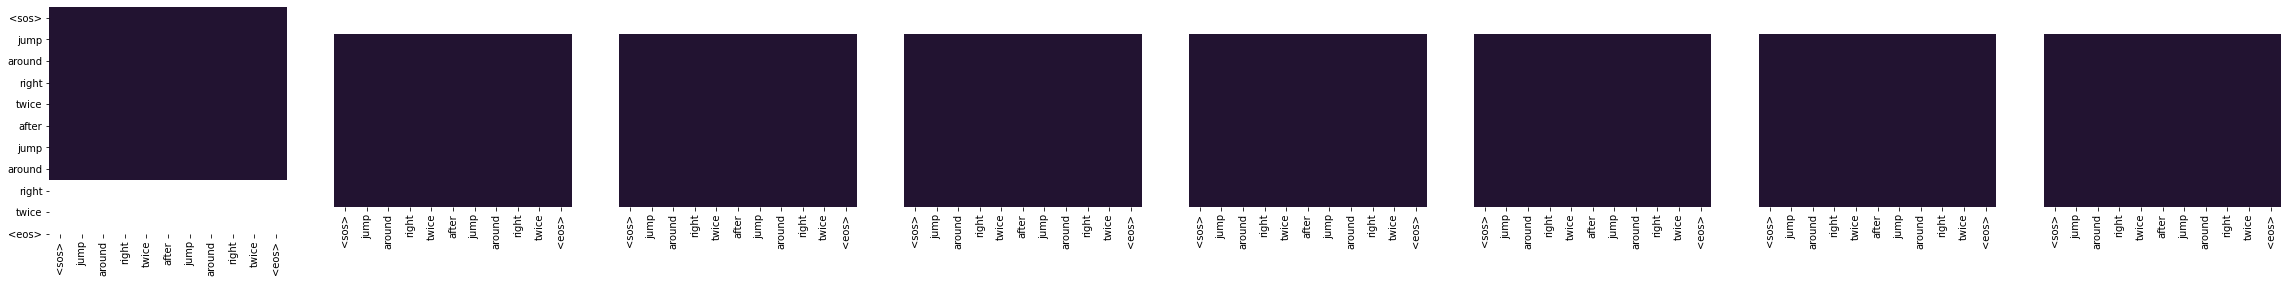

Encoder Layer 5


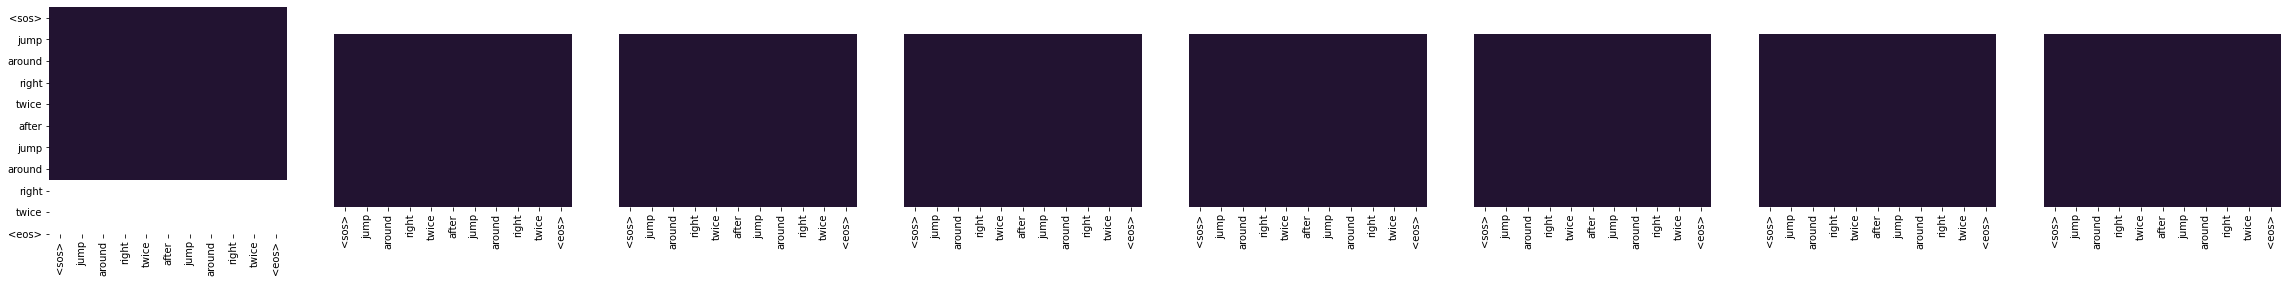

Encoder Layer 6


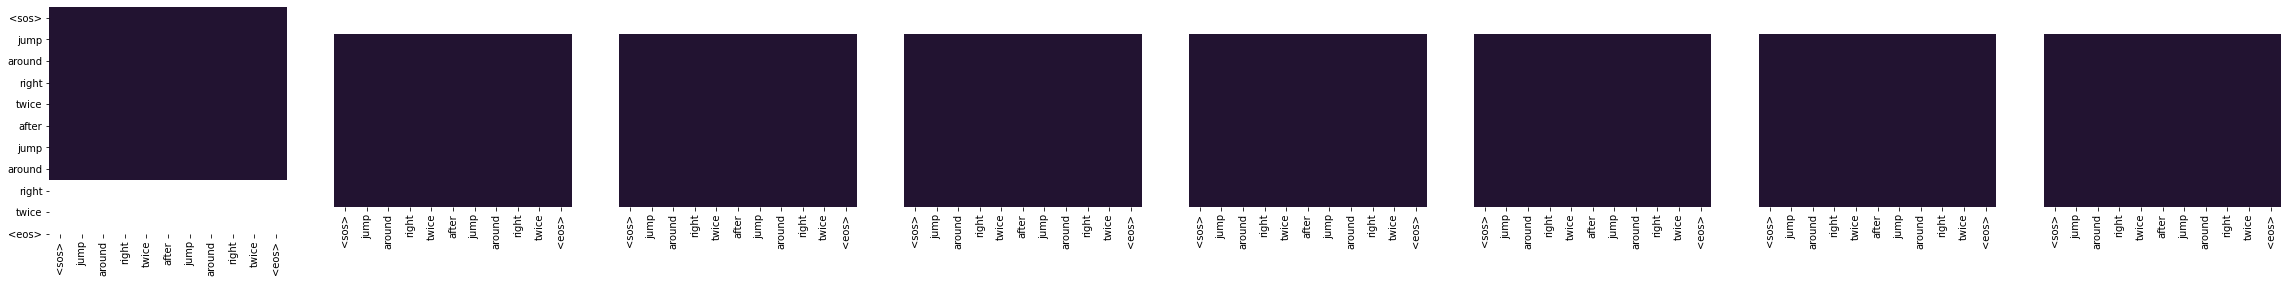

In [26]:
for layer in range(0, 6):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Encoder Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts.get('Encoder')[layer][2][:, h, :][:len(ss), :len(ss)], ss, ss if h == 0 else [], ax=axs[h])
    plt.show()

Decoder Self Attention Layer 1


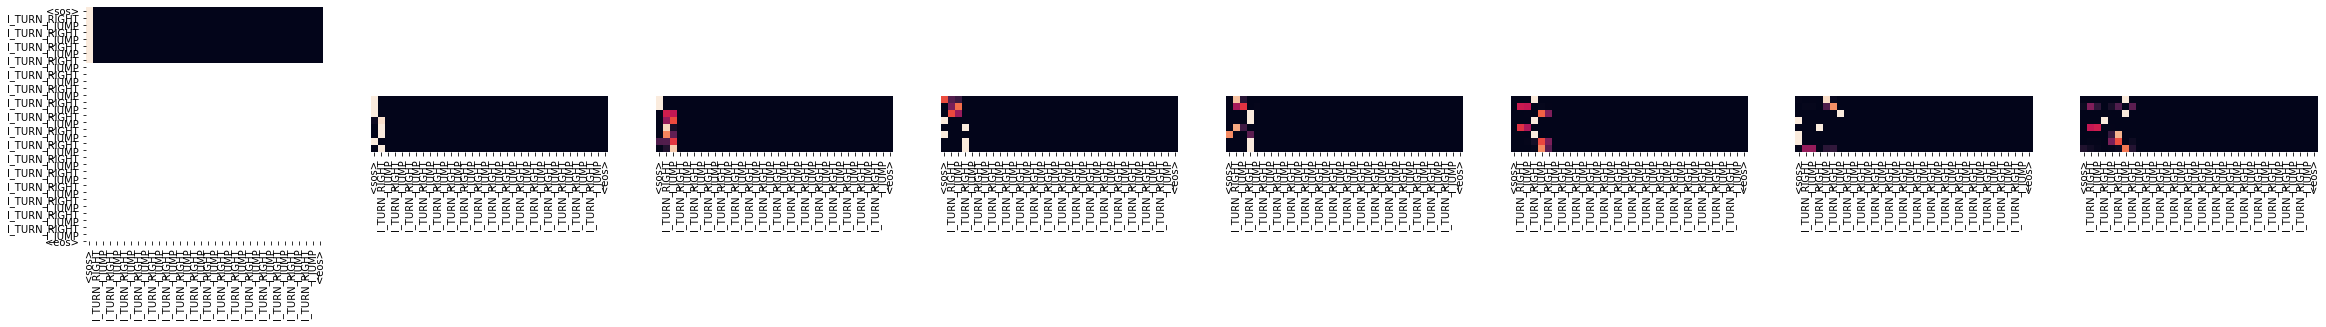

Decoder Self Attention Layer 2


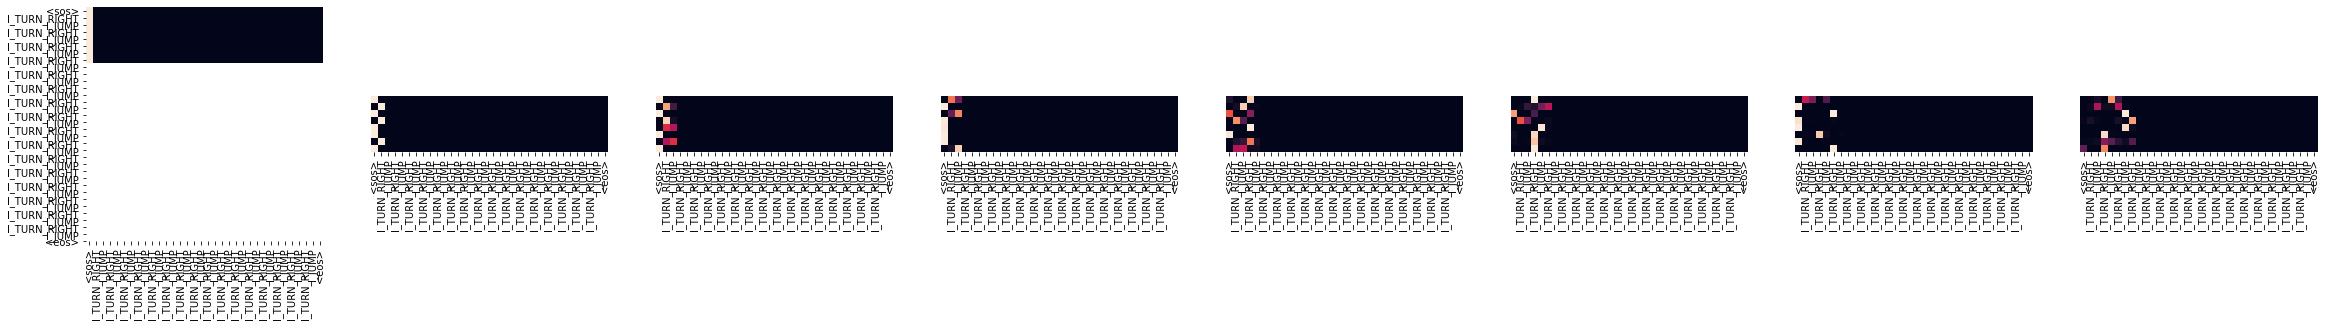

Decoder Self Attention Layer 3


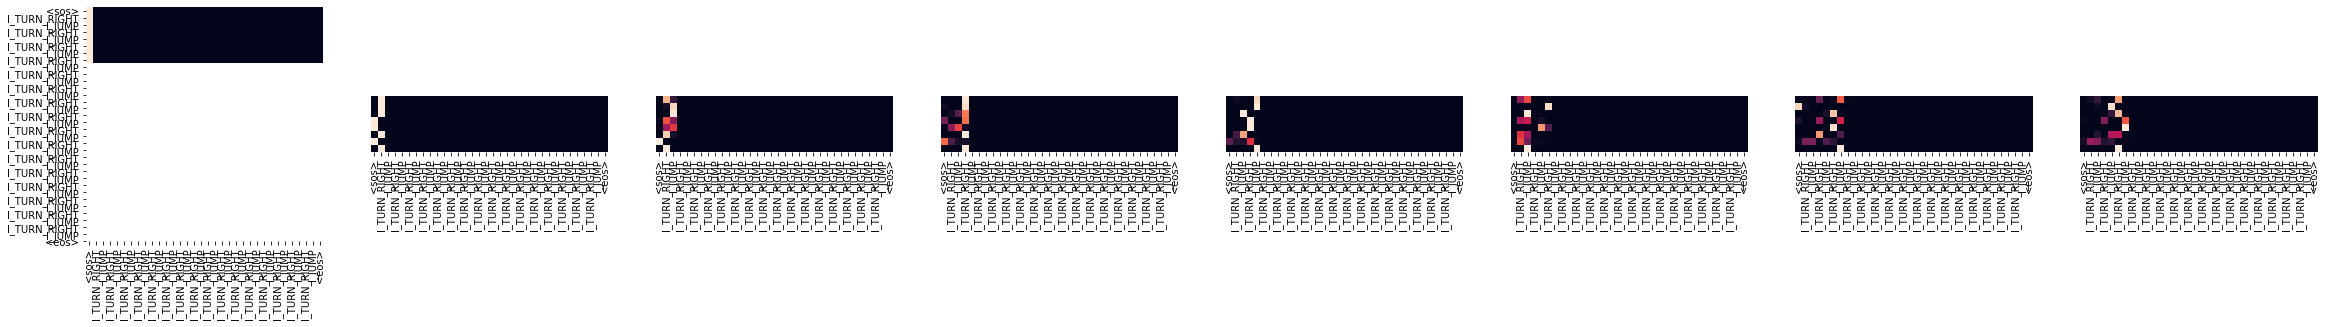

Decoder Self Attention Layer 4


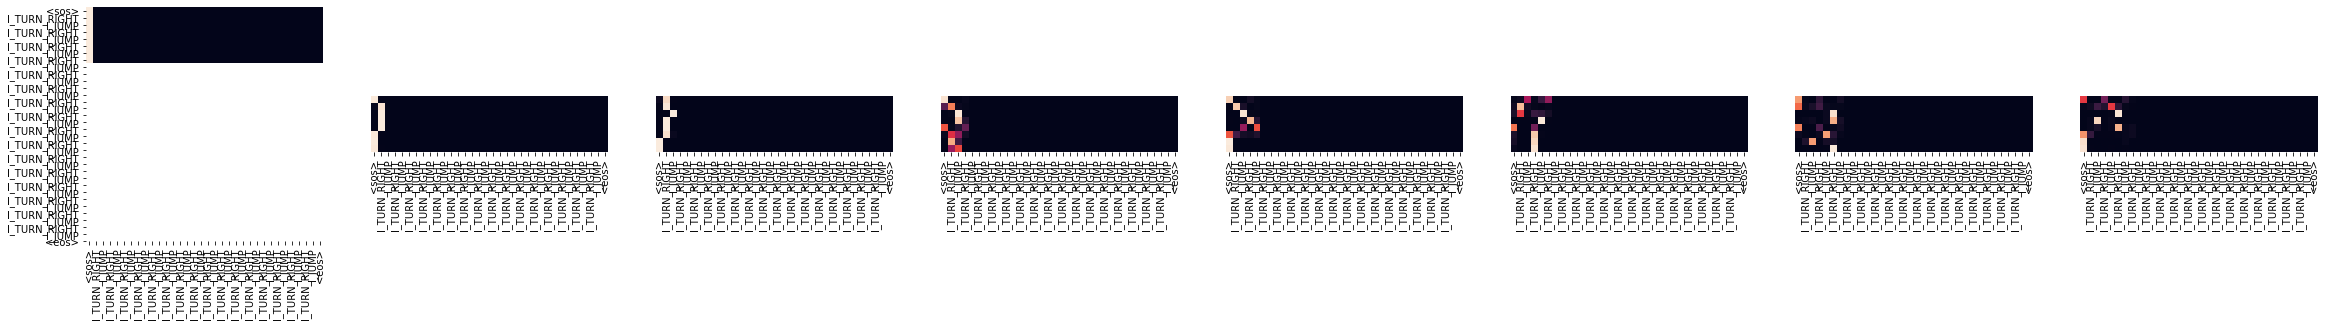

Decoder Self Attention Layer 5


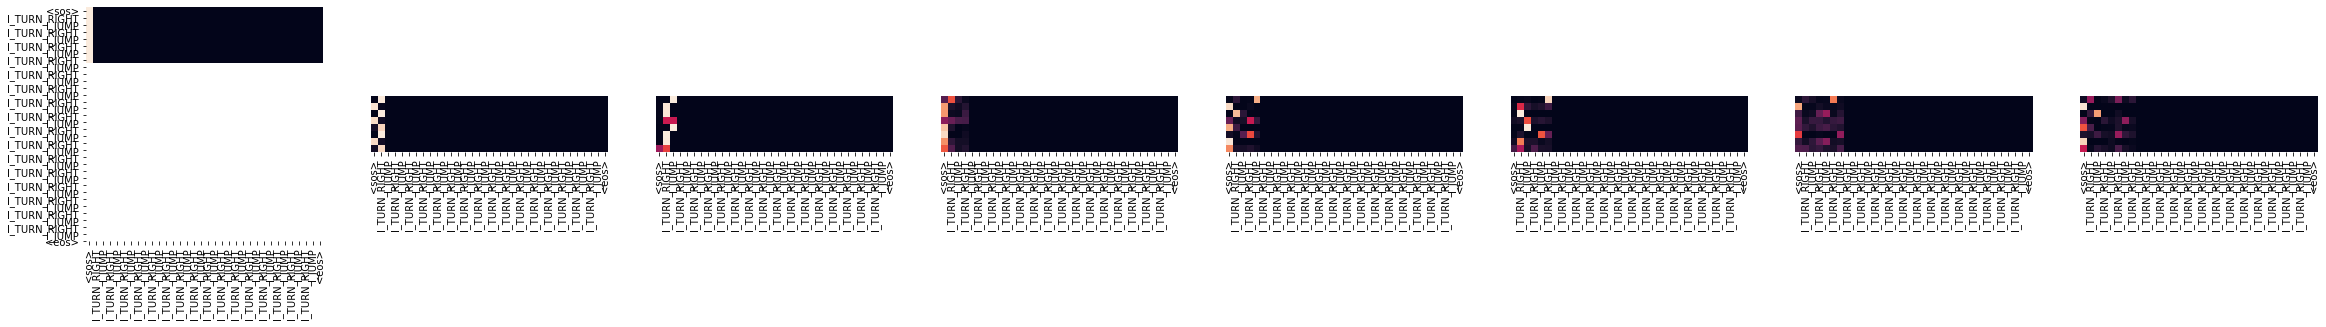

Decoder Self Attention Layer 6


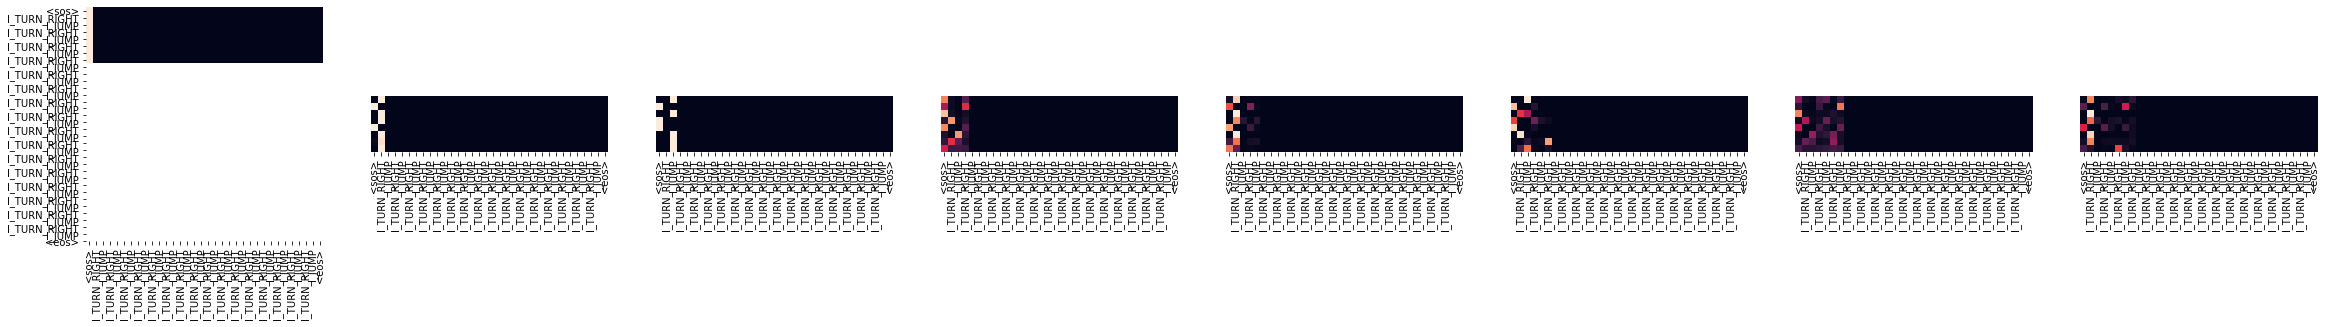

In [31]:
for layer in range(0, 6, 1):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Decoder Self Attention Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts.get('Decoder')[layer].get('Sublayer1')[2][:, h, :][:len(tt), :len(tt)], 
             tt, tt if h == 0 else [], ax=axs[h])
    plt.show()

Decoder MHA Layer 1


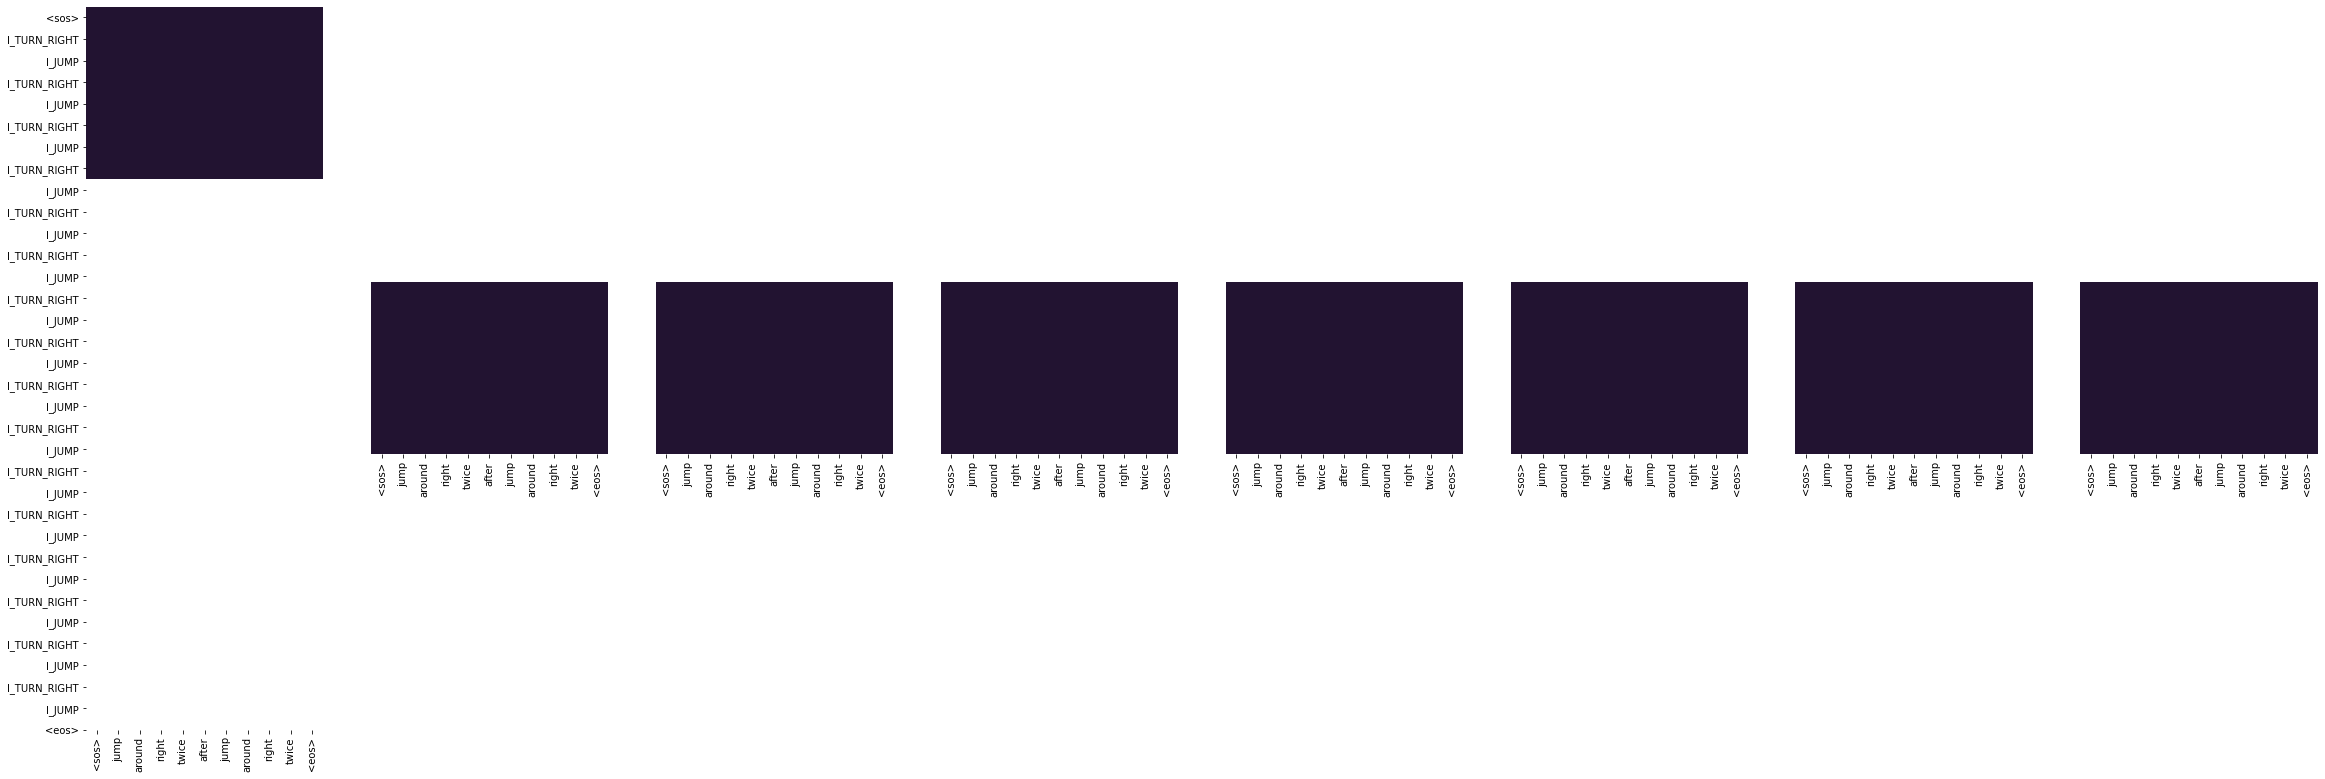

Decoder MHA Layer 2


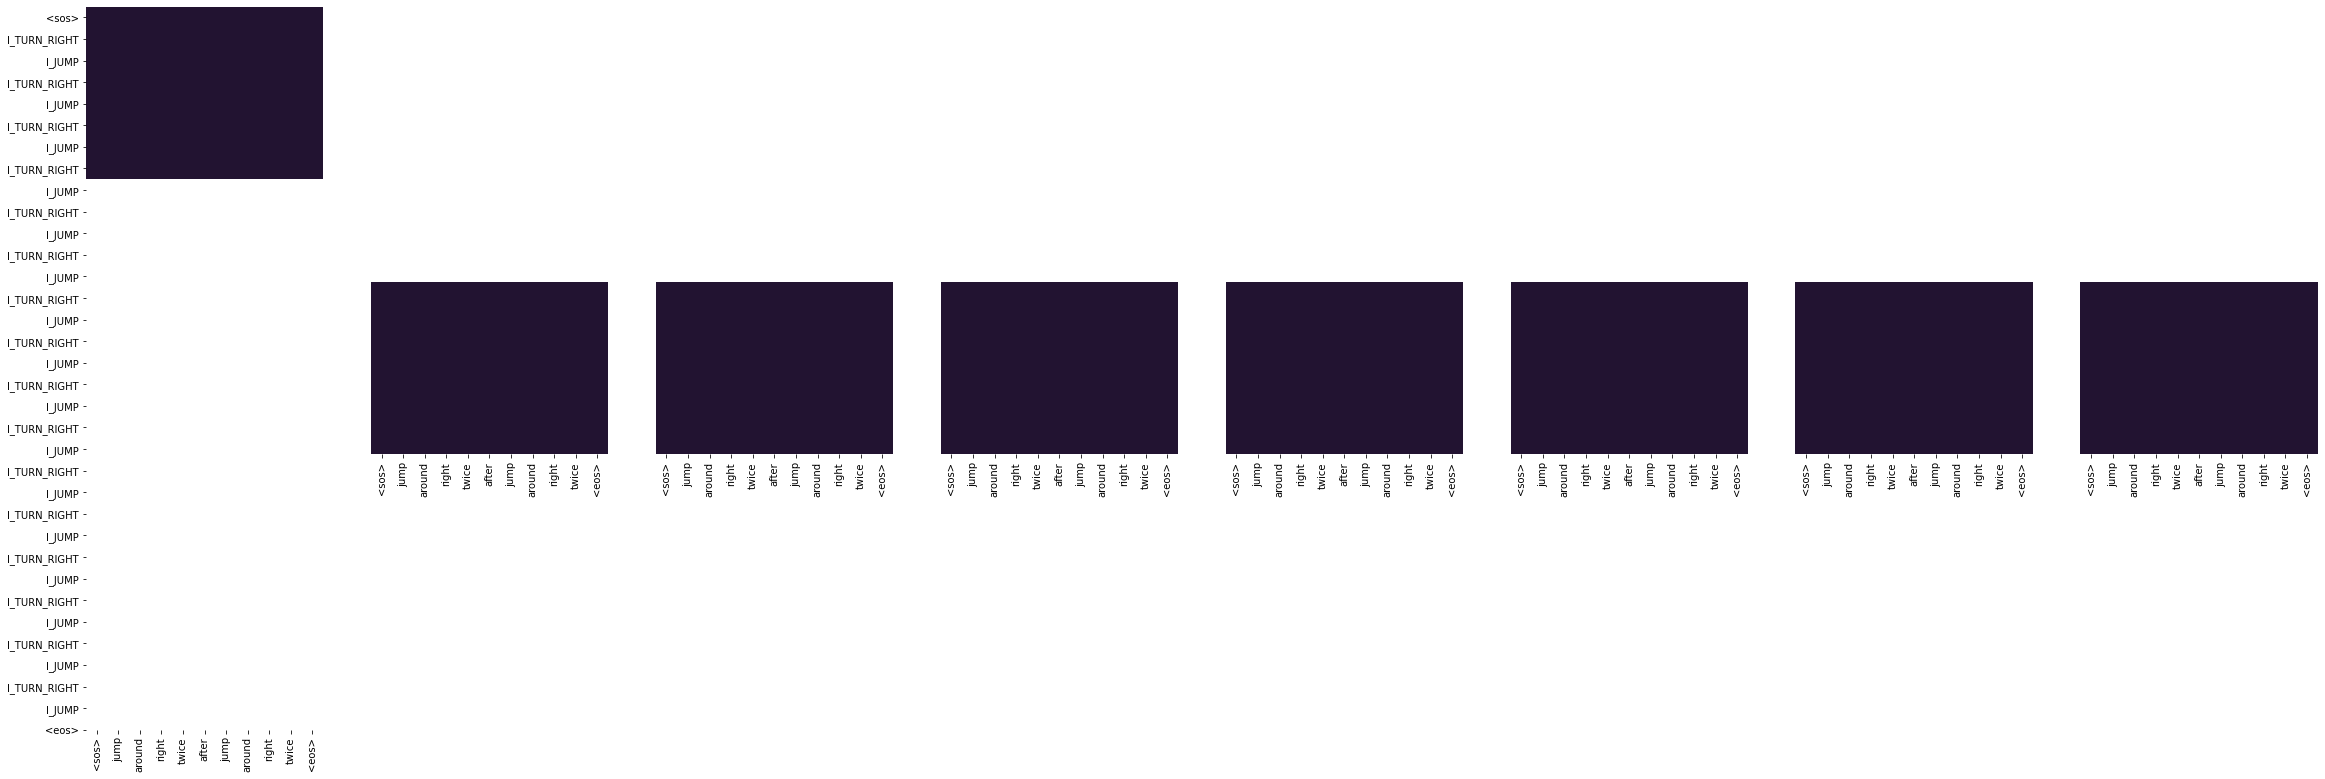

Decoder MHA Layer 3


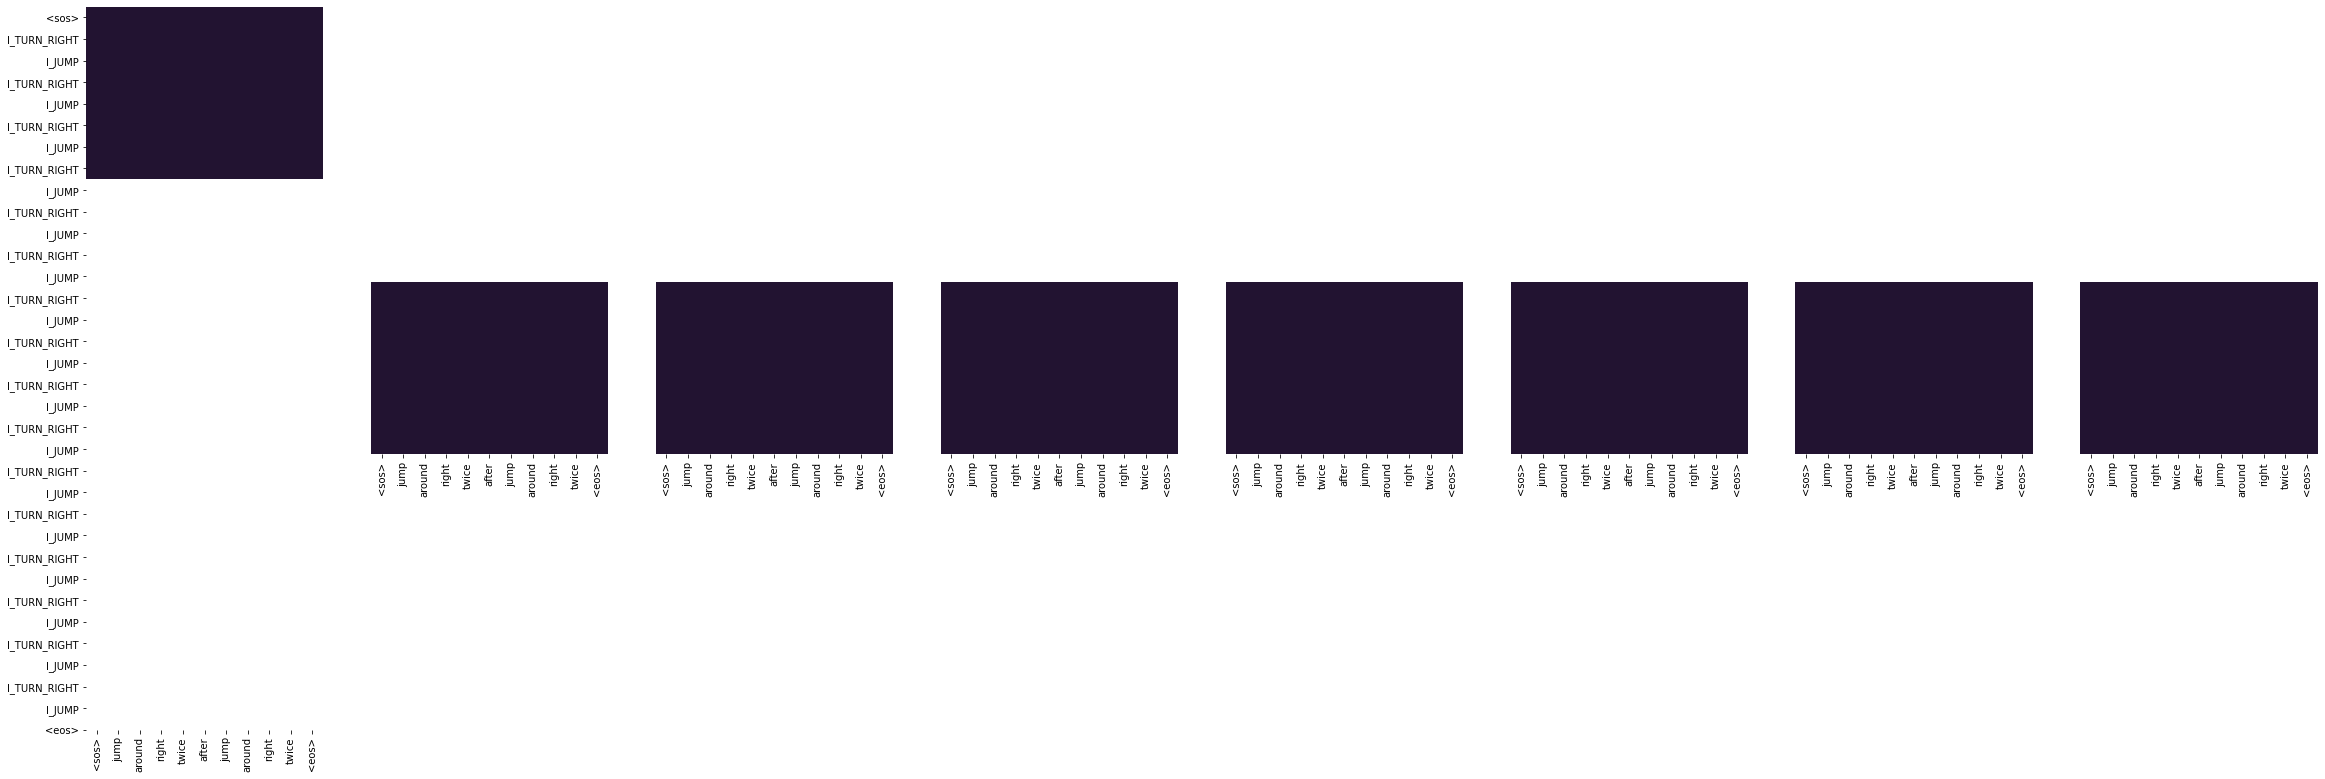

Decoder MHA Layer 4


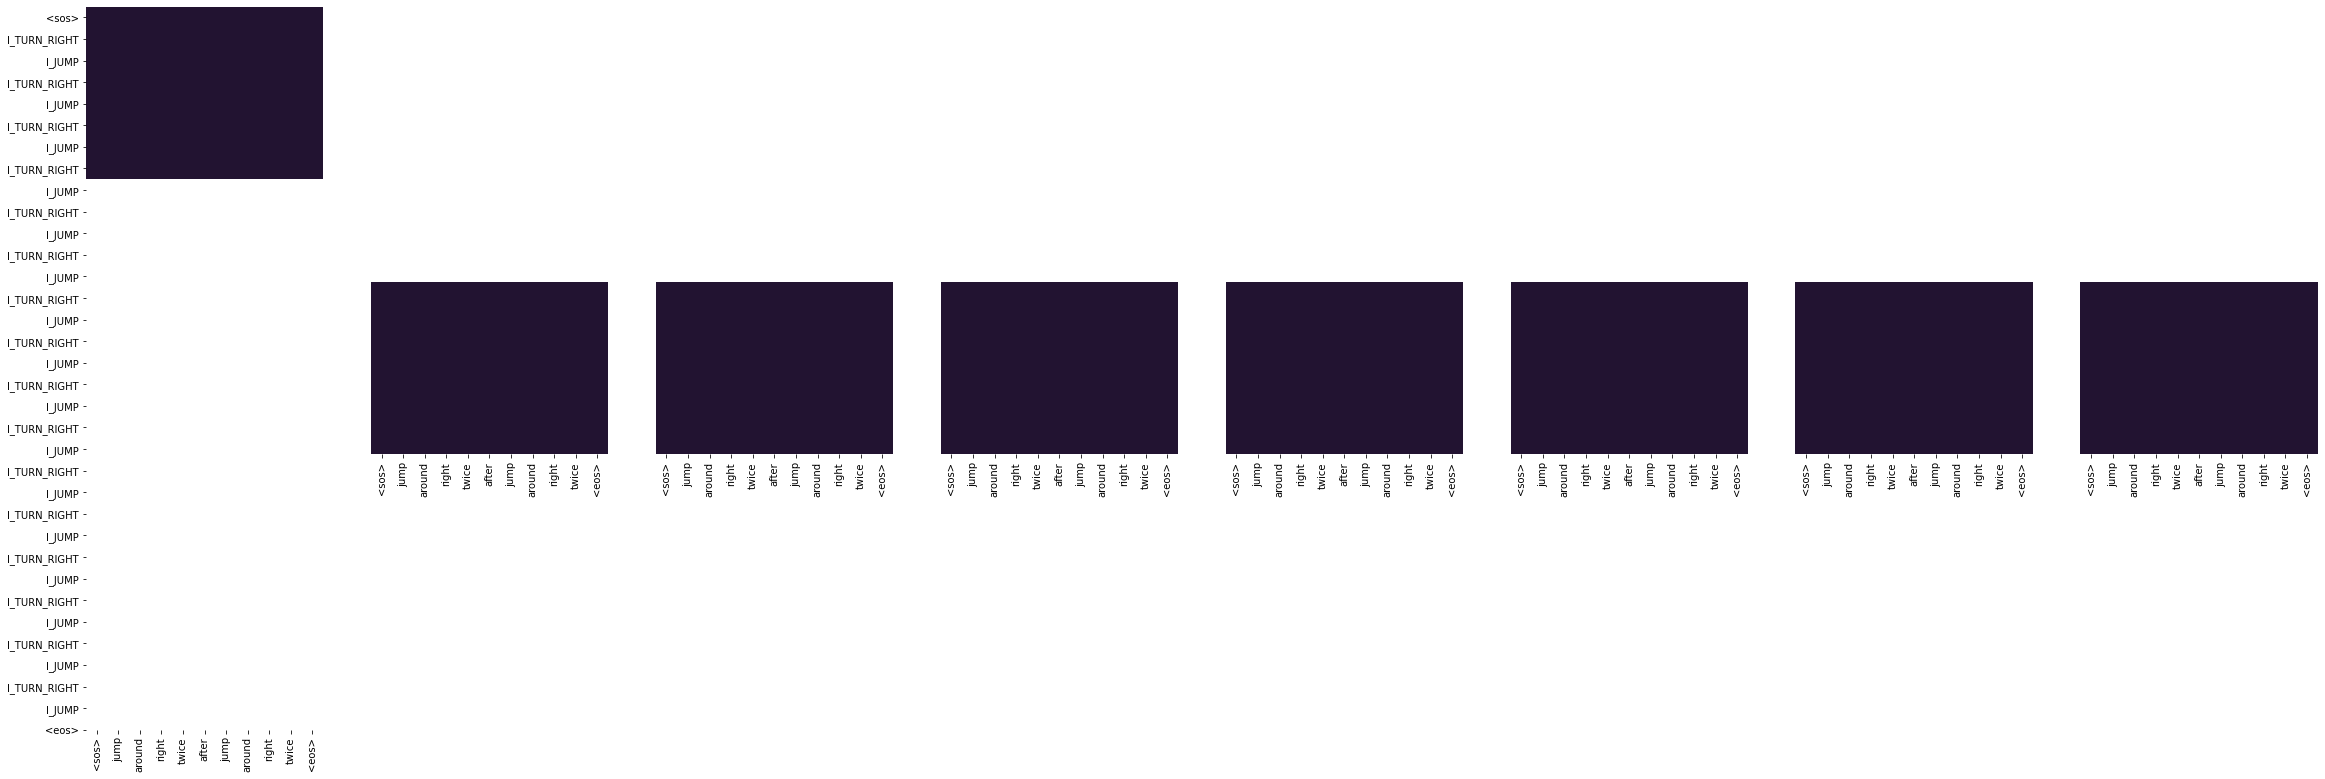

Decoder MHA Layer 5


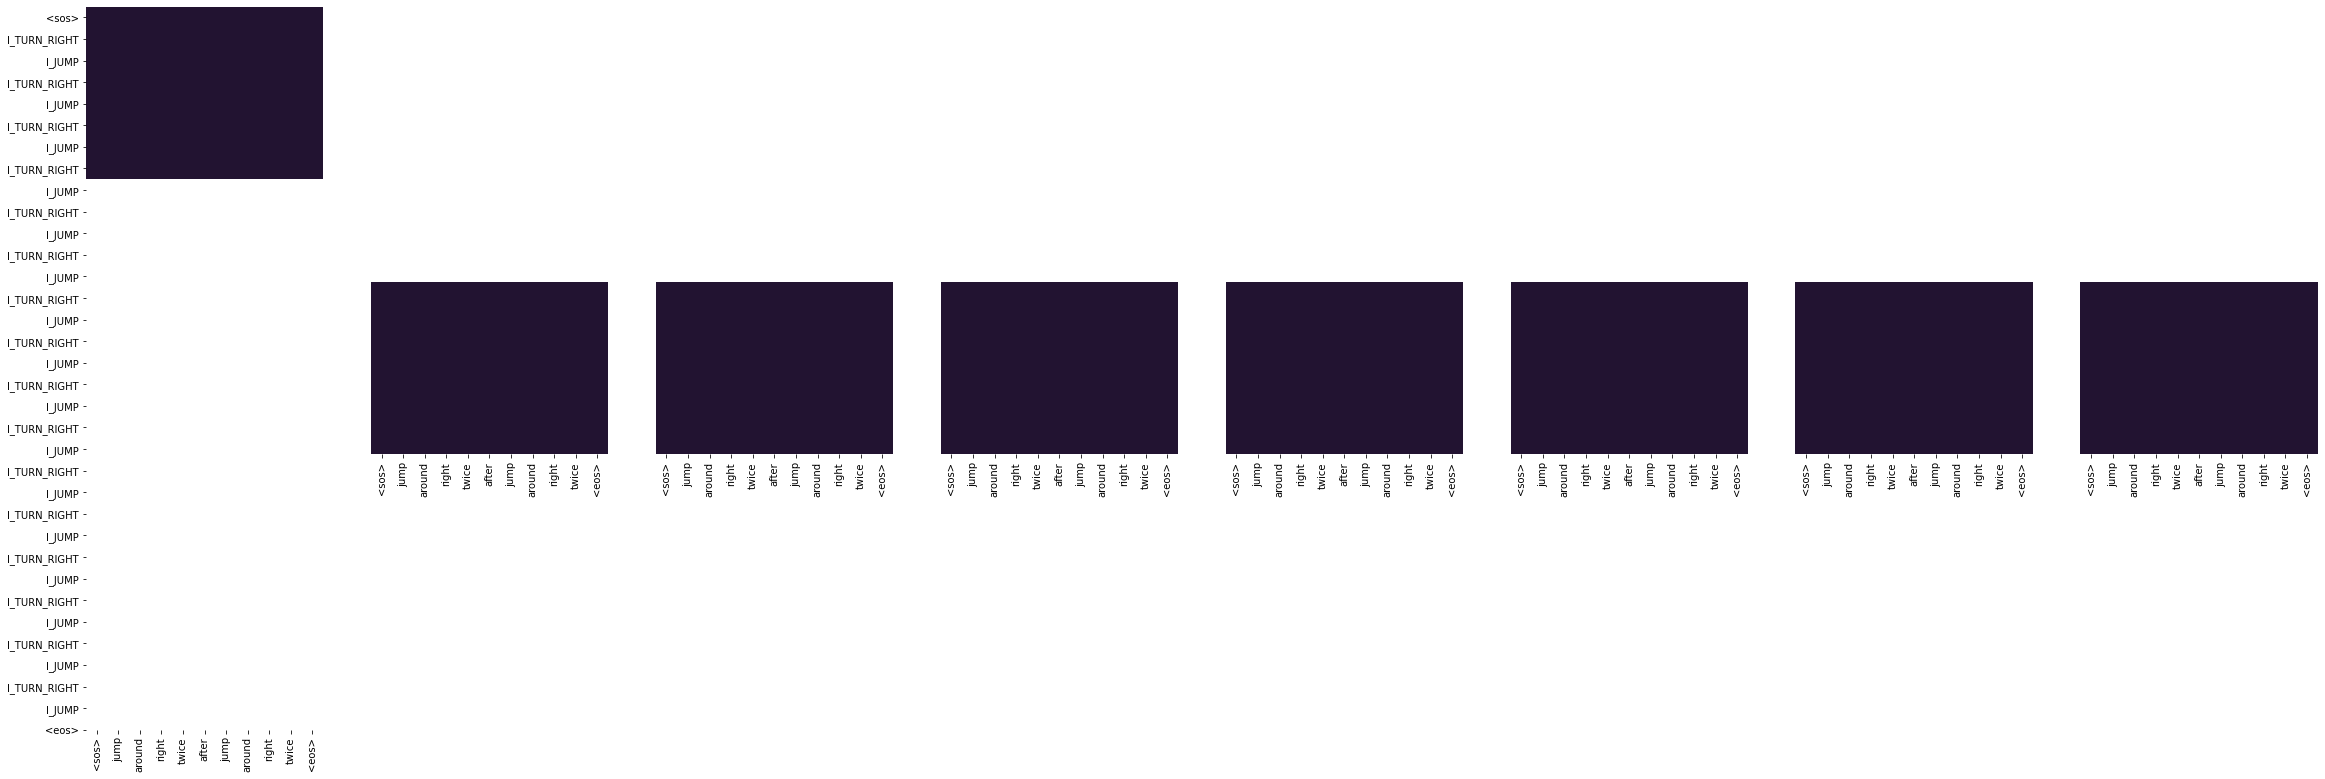

Decoder MHA Layer 6


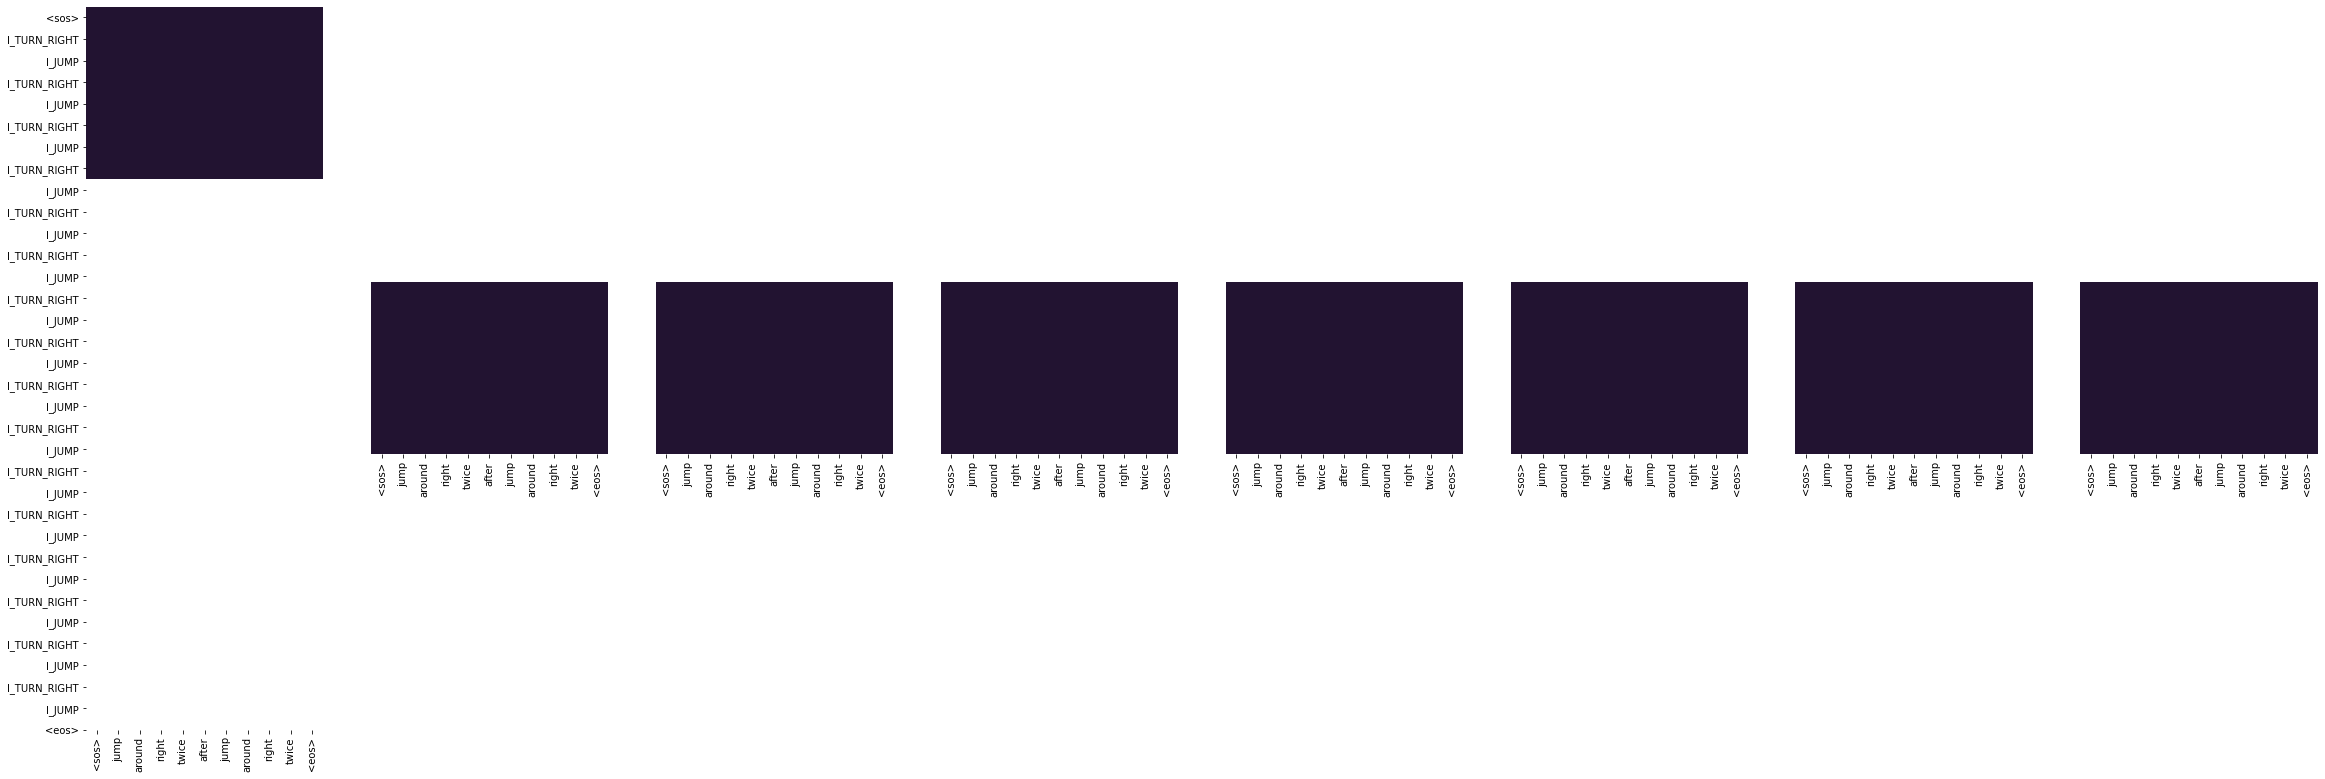

In [32]:
for layer in range(0, 6, 1):
    fig, axs = plt.subplots(1, 8, figsize=(40, 40))
    print(f"Decoder MHA Layer {layer + 1}")
    for h in range(8):
        draw(attn_wts.get('Decoder')[layer].get('Sublayer2')[2][:, h, :][:len(tt), :len(ss)],
             ss, tt if h == 0 else [], ax=axs[h])
    plt.show()

In [63]:
src_sent = []
trg_sent = []
src_pos_sent = []
trg_pos_sent = []
preds_sent = []

In [64]:
for batch in srcs:
    for s in batch:
        source = '<sos> '
        for i in range(1, s.shape[0]):
            sym = SRC.vocab.itos[s[i]]
            if sym == '<eos>': break
            source += sym + ' '
        source += '<eos>'
        ss = source
        src_sent.append(ss)

In [65]:
for batch in trgs:
    for s in batch:
        source = '<sos> '
        for i in range(1, s.shape[0]):
            sym = TRG.vocab.itos[s[i]]
            if sym == '<eos>': break
            source += sym + ' '
        source += '<eos>'
        ss = source
        trg_sent.append(ss)

In [66]:
for batch in src_poss:
    for s in batch:
        source = '<sos> '
        for i in range(1, s.shape[0]):
            sym = SRC_pos.vocab.itos[s[i]]
            if sym == '<eos>': break
            source += sym + ' '
        source += '<eos>'
        ss = source
        src_pos_sent.append(ss)

In [67]:
for batch in trg_poss:
    for s in batch:
        source = '<sos> '
        for i in range(1, s.shape[0]):
            sym = TRG_pos.vocab.itos[s[i]]
            if sym == '<eos>': break
            source += sym + ' '
        source += '<eos>'
        ss = source
        trg_pos_sent.append(ss)

In [68]:
for batch in preds:
    for s in batch:
        source = '<sos> '
        for i in range(1, s.shape[0]):
            sym = TRG.vocab.itos[s[i]]
            if sym == '<eos>': break
            source += sym + ' '
        source += '<eos>'
        ss = source
        preds_sent.append(ss)

In [83]:
print(src_sent[21]) 
print(trg_pos_sent[21])
print(trg_sent[21]) 
print(preds_sent[21])

<sos> walk opposite right twice and jump opposite right <eos>
<sos> I_TURN_RIGHT I_TURN_RIGHT PRIM I_TURN_RIGHT I_TURN_RIGHT PRIM I_TURN_RIGHT I_TURN_RIGHT PRIM <eos>
<sos> I_TURN_RIGHT I_TURN_RIGHT I_WALK I_TURN_RIGHT I_TURN_RIGHT I_WALK I_TURN_RIGHT I_TURN_RIGHT I_JUMP <eos>
<sos> I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK <eos>


In [84]:
model

Seq2Seq(
  (embedding): EmbeddingMultilinearSinusoidal(
    (dropout): Dropout(p=0.1, inplace=False)
    (x_embedding): Embedding(17, 256)
    (m_embedding): Embedding(17, 256)
    (linear): Linear(in_features=256, out_features=256, bias=True)
  )
  (encoder): Encoder(
    (layers): ModuleList(
      (0): EncoderLayer(
        (x_layernorm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (m_layernorm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (MHA): SelfAttention(
          (W_q): Linear(in_features=256, out_features=256, bias=True)
          (W_k): Linear(in_features=256, out_features=256, bias=True)
          (W_v): Linear(in_features=256, out_features=256, bias=True)
          (W_xo): Linear(in_features=256, out_features=256, bias=True)
          (W_mo): Linear(in_features=256, out_features=256, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (x_dropout1): Dropout(p=0.1, inplace=False)
        (m_dropout1): Dropou